<b><span style="font-size:210%">목차</span></b> <br>
1. <b><span style="font-size:110%">데이터 전처리<br></span> </b> 
    1-1. Potention Ouliers 임퓨테이션<br>
    1-2. 로그변환 (1-1. 과 상호작용)<br>
2. <b><span style="font-size:110%">피처엔지니어링<br></span></b>
    2-1. type_as 파생변수생성<br>
    2-2. type_im 파생변수 생성<br>
    2-3. area  파생변수 생성<br>
    2-4. area_pop 파생변수 생성<br>
    2-5. type_qual 파생변수 생성 <br>
    2-6. fee_deposit, fee_rent 파생변수 생성<br>
    2-7. CODE 그룹화<br>
3. <b><span style="font-size:110%">모델링<br></span></b>
   3-1. 다중 선형 회귀(Multiple Linear Regression)<br>
      <span style="font-size:90%">1) 모형 적합<br></span>
      <span style="font-size:90%">2) Test Set에 전처리 과정 적용<br></span>
      <span style="font-size:90%">3) 최종 모형 적합<br></span>
   3-2. 랜덤포레스트 (Random Forest)<br>
   3-3. 서포트 벡터 머신(Suport Vector Machine)<br>
   3-4. 배깅(Bagging)
4. <b><span style="font-size:110%"> 성능개선</span> <br></b>
   4-1. 성별과 나이 데이터셋 머징후 성능 확인<br>
   4-2. 정규화 후 성능 확인

# 1. 데이터 전처리(Pre-processing)

In [3]:
#데이터 로드 및 구조 간단 확인
setwd("C:/dacon/re")

In [293]:
train<-read.table("train0722(1).csv",  sep=",", header=T)

In [128]:
str(train)

'data.frame':	2869 obs. of  14 variables:
 $ code       : Factor w/ 411 levels "C1000","C1004",..: 360 360 360 360 360 360 360 91 91 91 ...
 $ tot_pop    : int  545 545 545 545 545 545 545 1216 1216 1216 ...
 $ type_as    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region     : int  3 3 3 3 3 3 3 7 7 7 ...
 $ type_im    : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area       : num  33.5 39.6 39.6 46.9 46.9 ...
 $ num_empty  : int  17 17 17 17 17 17 17 13 13 13 ...
 $ type_qual  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ fee_deposit: num  9216000 12672000 12672000 18433000 18433000 ...
 $ fee_rent   : num  82940 107130 107130 149760 149760 ...
 $ sub        : int  0 0 0 0 0 0 0 1 1 1 ...
 $ bus        : int  3 3 3 3 3 3 3 1 1 1 ...
 $ num_park   : int  624 624 624 624 624 624 624 1285 1285 1285 ...
 $ target     : int  205 205 205 205 205 205 205 1064 1064 1064 ...


## 1-1. 이상치 처리

1) tot_pop

[,1]
[1,]   26
[2,]  514
[3,]  775
[4,] 1105
[5,] 1988
attr(,"class")
        1 
"integer"

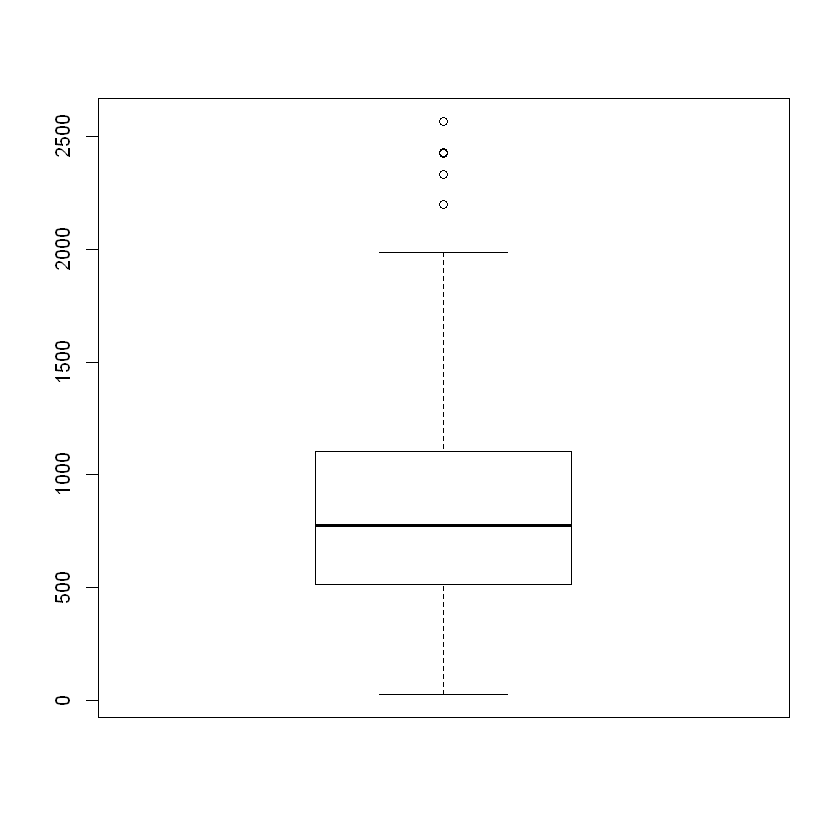

In [129]:
boxplot(train$ tot_pop)$stats

In [130]:
quantile (train$ tot_pop, probs=0.99)

99% 
2428

In [165]:
quantile (train$ tot_pop, probs=c(0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96,0.97,0.99, 1))

10%  20%  30%  40%  50%  60%  70%  80%  90%  95%  96%  97%  99% 100% 
 363  480  560  656  775  886 1005 1215 1546 1988 2200 2200 2200 2200

In [294]:
train$tot_pop<-ifelse(train$tot_pop>=2200, 2200, train$tot_pop)

26
514
781
1116
1988


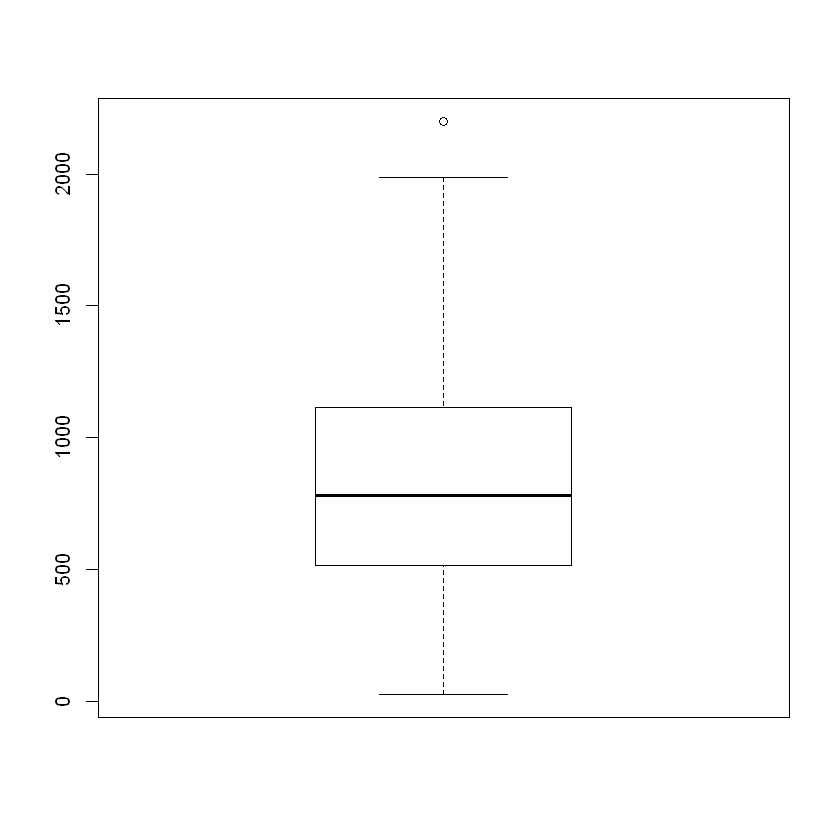

In [65]:
boxplot( train$tot_pop) $stats

2) num_empty

[,1]
[1,]    0
[2,]    4
[3,]   11
[4,]   20
[5,]   43
attr(,"class")
        1 
"integer"

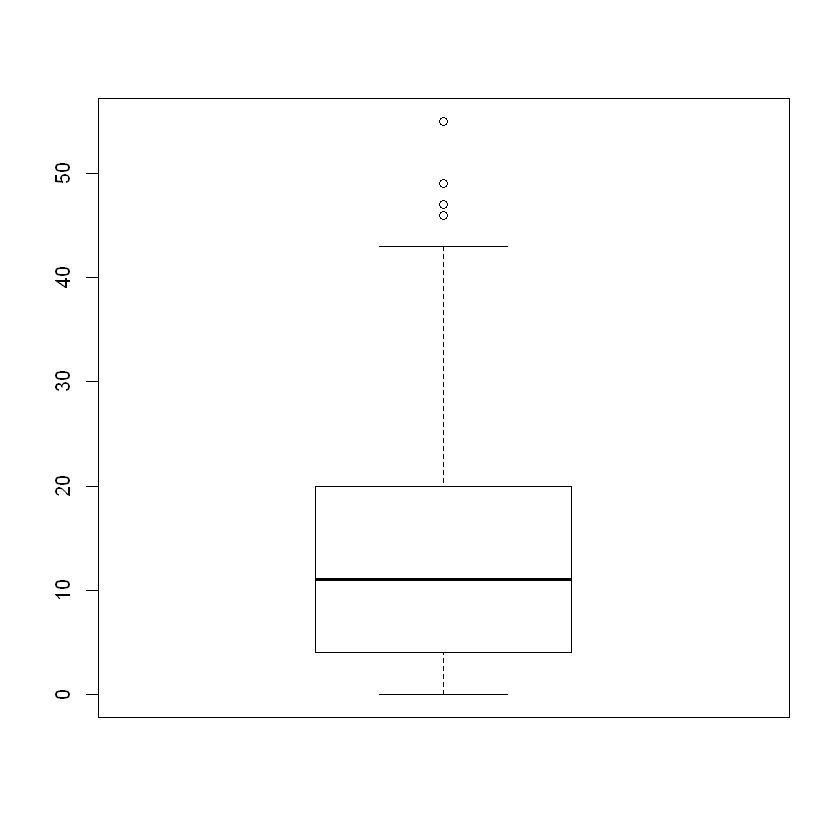

In [133]:
boxplot(train$ num_empty )$stats

In [134]:
quantile (train$ num_empty, probs=c(0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98,0.99,  1))

10%  20%  30%  40%  50%  60%  70%  80%  90%  95%  96%  97%  98%  99% 100% 
   1    2    5    7   11   14   17   22   28   32   34   36   40   46   55

In [29]:
table(train$ num_empty)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
116 245 254 110 107  78  44 232  58  98 106  34  40 230  84  96  94  70  32  47 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
 48 104  54  37  31  56  47  20  52  81  19  13  35  12  24   4  18  11  13   8 
 40  41  42  43  46 
 11   4   4   5  39 

0
4
11
20
43


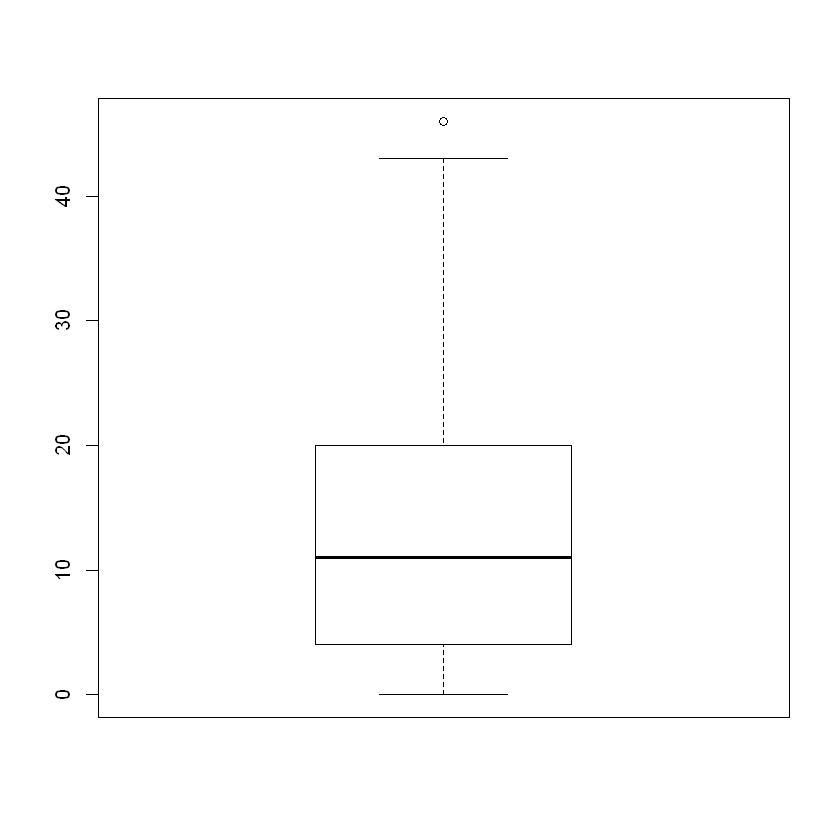

In [42]:
boxplot(train$ num_empty )$stats

In [295]:
train$num_empty<-ifelse(train$num_empty>=46, 46, train$num_empty)

0
4
11
20
43


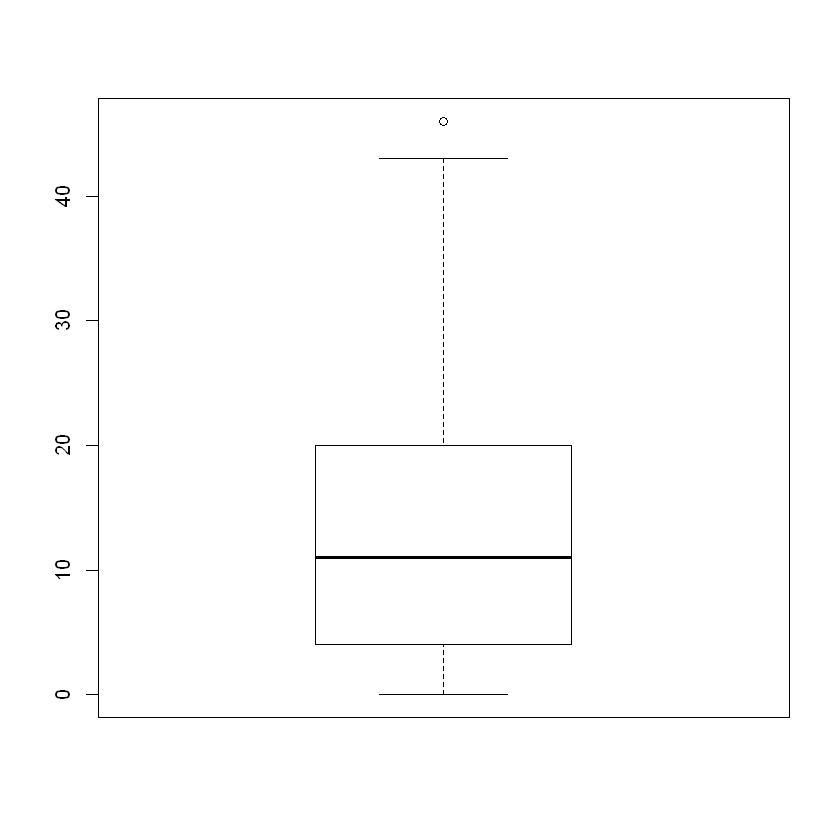

In [136]:
boxplot(train$num_empty)$stats

In [64]:
quantile (train$ num_empty, probs=c(0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98,0.99,  1))

10%   20%   30%   40%   50%   60%   70%   80%   90%   95%   96%   97%   98% 
 1.00  2.00  5.00  7.00 11.00 14.00 17.00 22.00 29.00 33.00 34.04 37.00 40.00 
  99%  100% 
46.00 46.00

3) fee_deposit

3056000
14278000
20303000
31958000
58132000


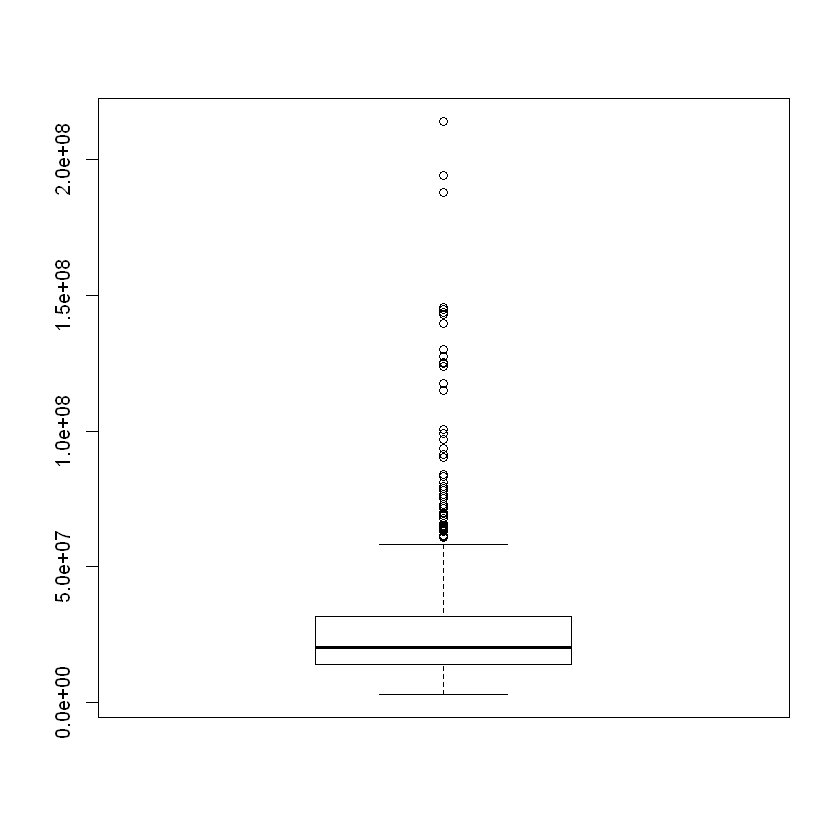

In [137]:
boxplot(train$ fee_deposit)$stats

## 1-2. 로그변환(1-1. 과 상호작용)

3-1) fee_deposit ㅡ> log_fee_deposit

In [ ]:
train$log_fee_deposit<-log(train$ fee_deposit)

15.35152
16.47423
16.82628
17.27993
18.42467


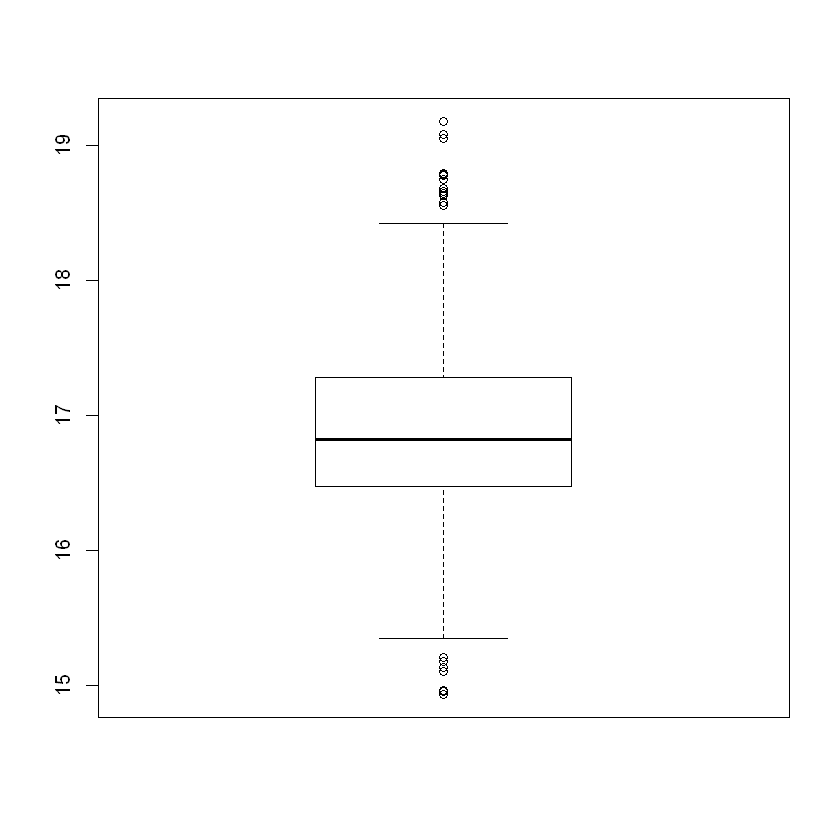

In [139]:
boxplot(   train$log_fee_deposit   ) $stats

In [140]:
quantile (train$log_fee_deposit  , probs=c(0,0.01,0.05,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98,0.99,  1))

0%       1%       5%      10%      20%      30%      40%      50% 
14.93262 15.20946 15.90128 16.10786 16.38215 16.55105 16.69616 16.82628 
     60%      70%      80%      90%      95%      96%      97%      98% 
16.98959 17.15480 17.39653 17.63294 17.92638 17.97189 18.08592 18.19127 
     99%     100% 
18.56031 19.18085

In [297]:
train$log_fee_deposit<-ifelse(train$log_fee_deposit>=18.5603093794259, 18.5603093794259, train$log_fee_deposit)   #0.99

In [298]:
train$log_fee_deposit<-ifelse(train$log_fee_deposit<=15.2094554708413, 15.2094554708413, train$log_fee_deposit)   #0.01

15.35152
16.47423
16.82628
17.27993
18.42467


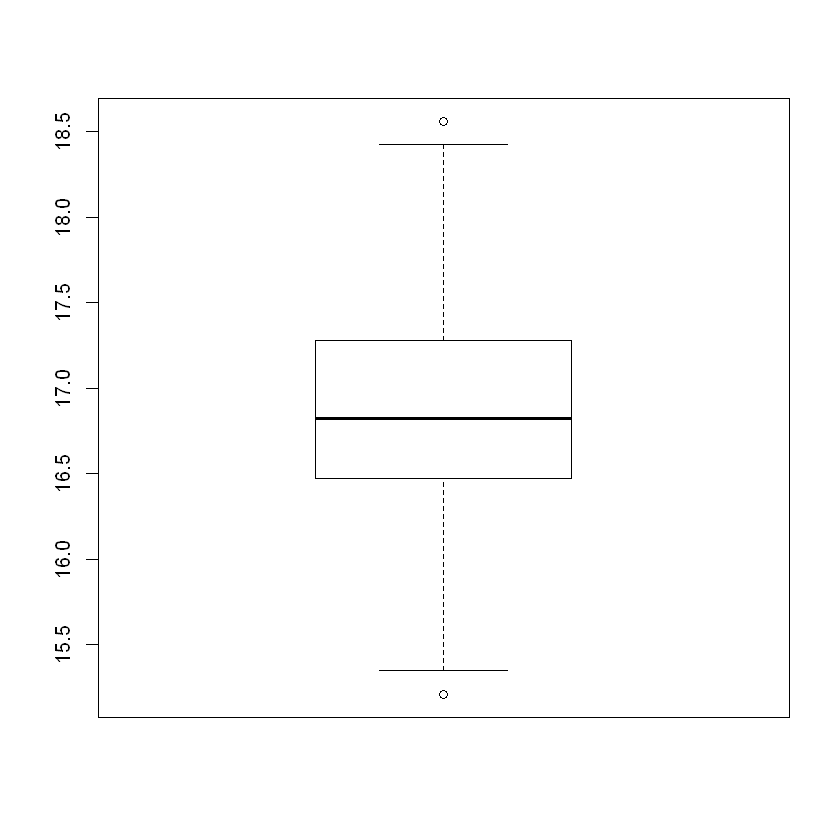

In [143]:
boxplot(train$log_fee_deposit)$stats

4) fee_rent

16650
110110
156070
231630
409500


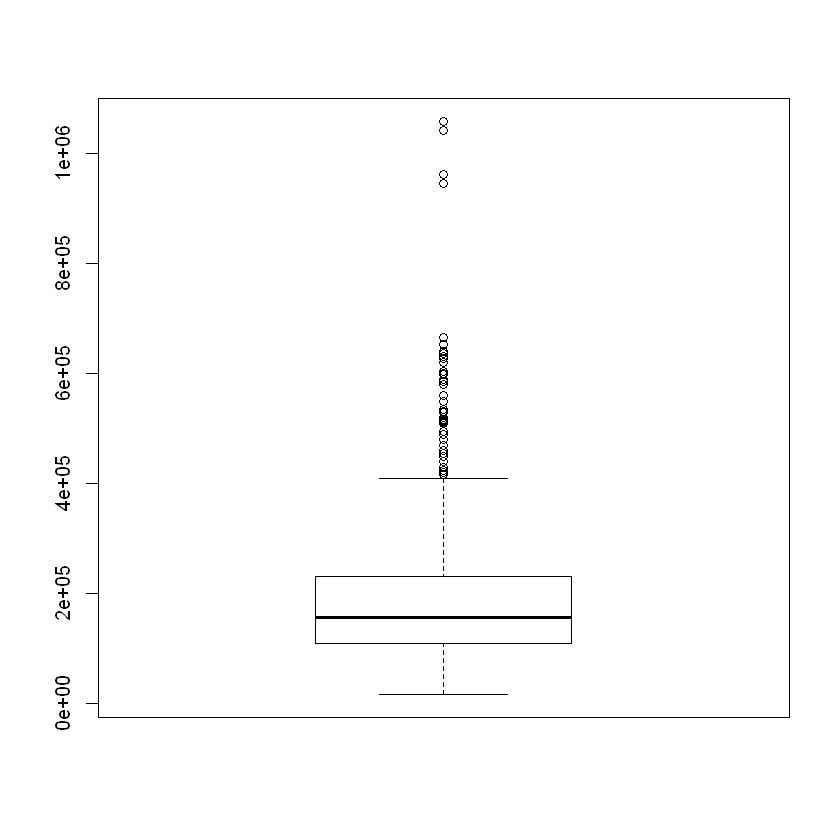

In [144]:
boxplot(train$ fee_rent)$stats

4-1) log_fee_rent

In [299]:
train$ log_fee_rent<-log(train$fee_rent)

10.52675
11.60924
11.95806
12.35290
13.40828


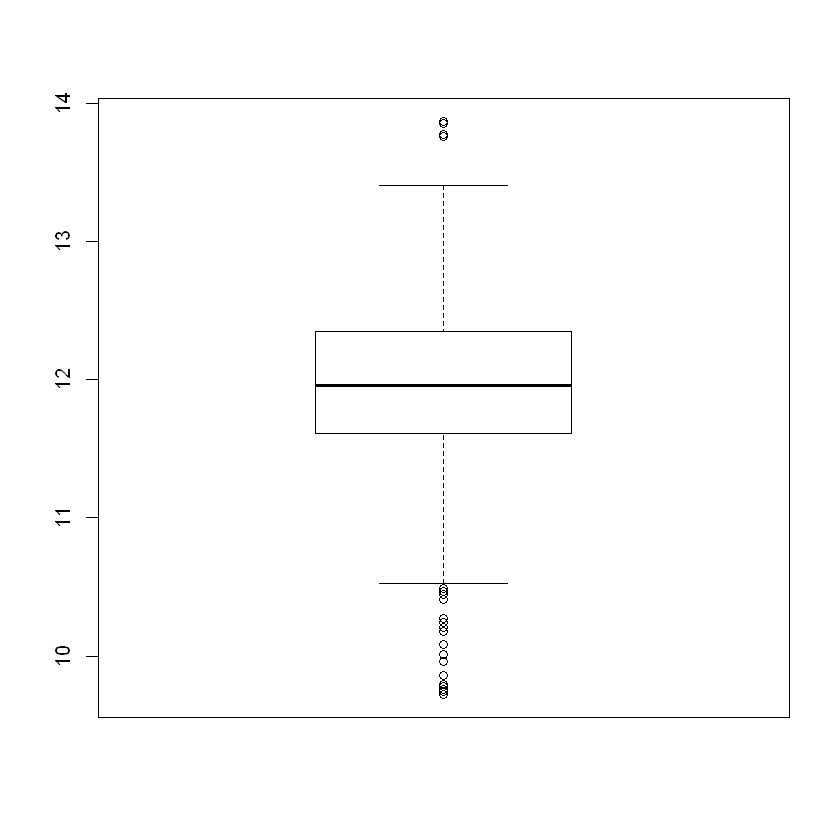

In [146]:
boxplot(train$ log_fee_rent)$stats

In [306]:
quantile (train$log_fee_rent, probs=c(0, 0.01, 0.05,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98,0.99,  0.995,1)) # 0.96

0%       1%       5%      10%      20%      30%      40%      50% 
10.26731 10.26905 11.16823 11.30171 11.52208 11.68115 11.83072 11.95806 
     60%      70%      80%      90%      95%      96%      97%      98% 
12.09228 12.24548 12.45309 12.73192 13.03898 13.12035 13.16255 13.28481 
     99%    99.5%     100% 
13.34883 13.34883 13.34883

In [110]:
table(train$ log_fee_rent)


9.72016549540859 9.74449182104567 9.75846178048587 9.77849106236144 
               1                2                2                2 
9.79590234185619 9.86162334843743  9.9579757378202 10.0145816000417 
               1                1                7                4 
10.0837236028391 10.1803614262713 10.2058119017248 10.2449473306684 
               1                3                3                2 
10.2698652719362 10.4081944952939  10.442609045457 10.4707880232301 
               1                1                3                3 
10.4887710872201 10.5267486056319 10.5283558923428  10.536088233228 
               2                3                5                4 
10.5453414387085 10.5870893202525 10.5926267116985 10.6132459989013 
               2                1                2                5 
10.6525423650344 10.6777537843809  10.718409790022 10.7705880402195 
               3                9                1                2 
10.7932289491767 10.8277464540595

In [307]:
train$log_fee_rent<-ifelse(train$log_fee_rent>=13.3488294031825, 13.3488294031825, train$log_fee_rent)   #0.99
train$log_fee_rent<-ifelse(train$log_fee_rent<=10.2673136747504, 10.2673136747504, train$log_fee_rent)   #0.01

10.52675
11.60924
11.95806
12.35290
13.34883


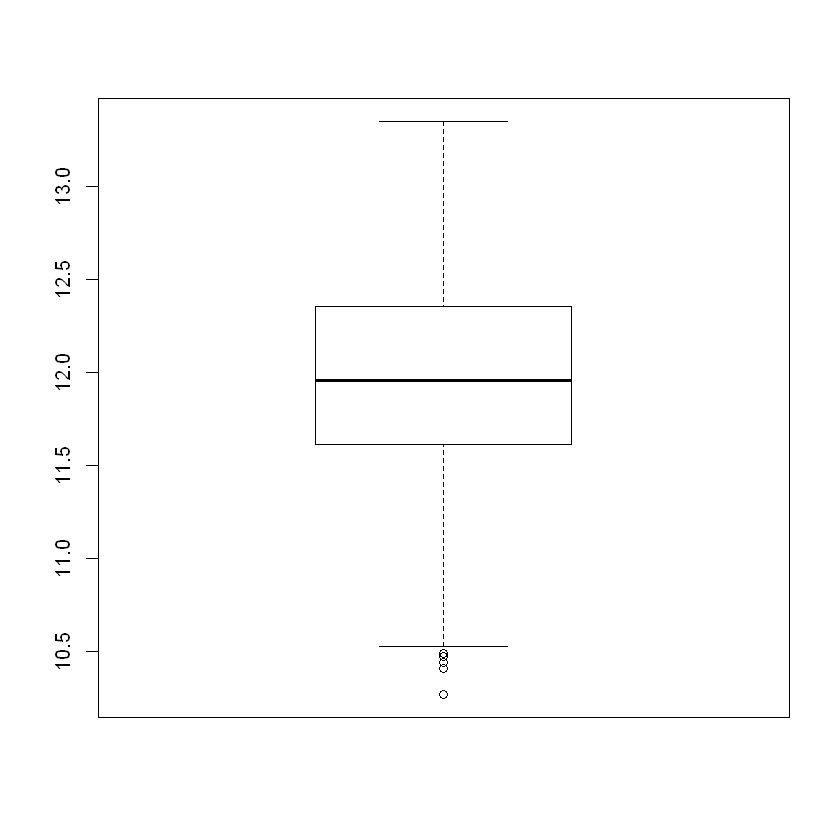

In [305]:
boxplot(train$log_fee_rent)$stats

5) num_park

[,1]
[1,]   13
[2,]  277
[3,]  500
[4,]  812
[5,] 1570
attr(,"class")
        1 
"integer"

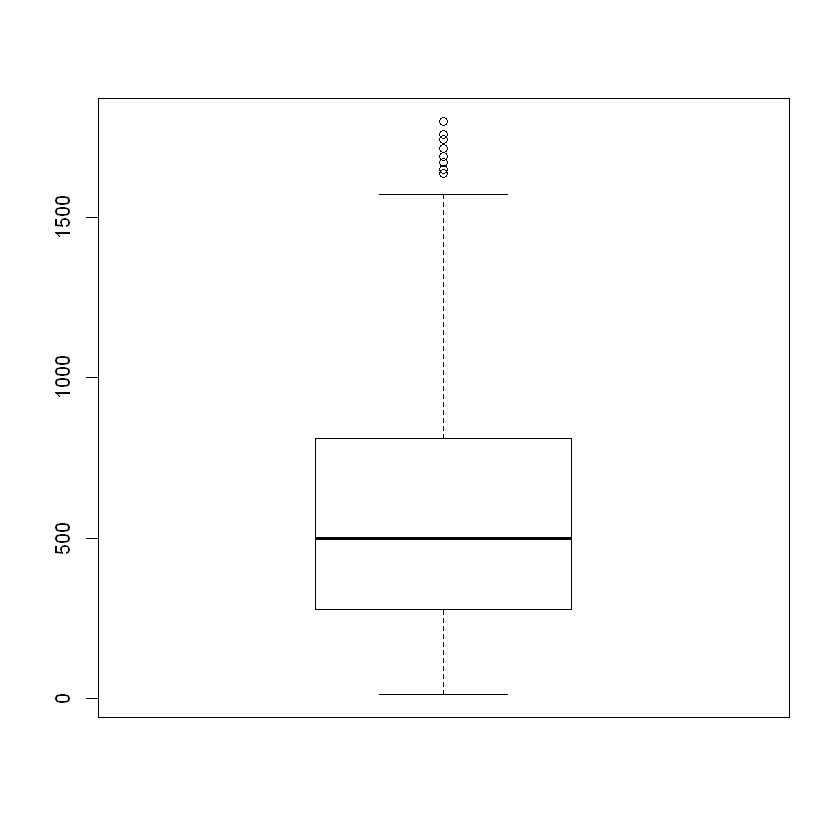

In [308]:
boxplot(train$ num_park) $stats

In [216]:
quantile (train$ num_park, probs=c(0 ,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,0.97,0.975,0.98,0.99, 1)) # 0.96

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%   95%   97% 97.5% 
   13   166   240   330   407   500   635   756   880  1137  1382  1570  1636 
  98%   99%  100% 
 1670  1670  1670

In [309]:
train$ num_park<-ifelse(train$ num_park>=1670, 1670, train$ num_park)   #0.98

13
277
500
812
1570


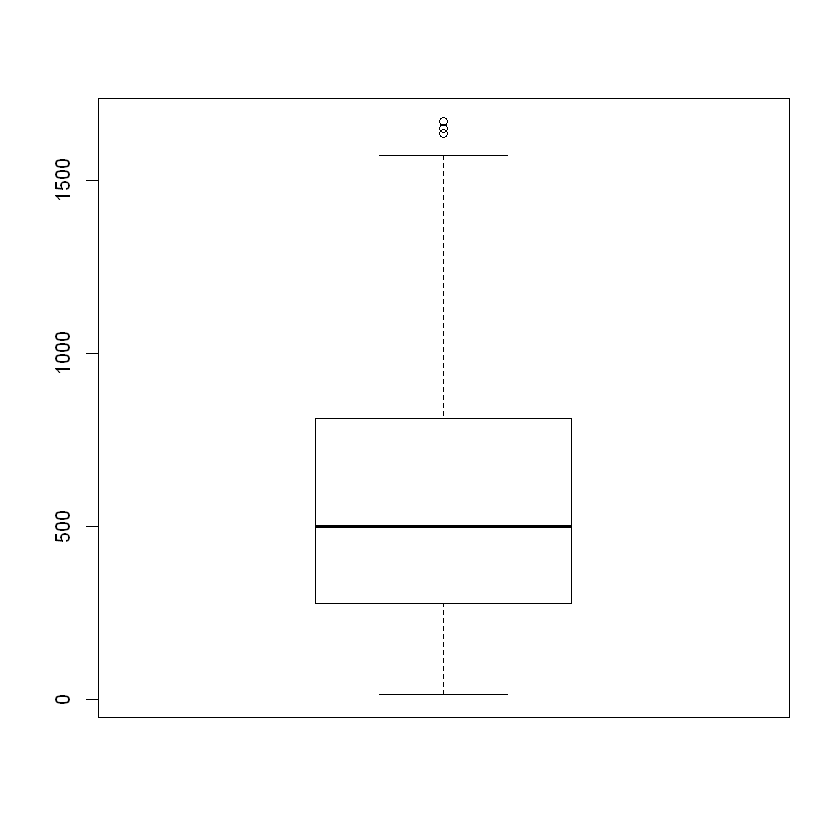

In [310]:
boxplot(train$ num_park) $stats

In [311]:
write.csv(train, "train0727(2).out.csv", row.names=F)

In [119]:
#test set 적용

# 2. 피처엔지니어링

## 2-1. type_as 파생변수생성
- type_new 아파트0 아파트+상가 1
- prop_sanga 상가비율

In [312]:
train<-read.table("train0727(2).out.csv", sep=',', header=T)

In [313]:
table(train$type_as)


   0    1 
2307  562 

In [225]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [23]:
head(train,5)

code,tot_pop,type_as,region,type_im,area,area_pop,num_empty,type_qual,fee_deposit,fee_rent,sub,bus,num_park,target,type_as0,type_as1,type_as2
C2483,900,0,4,6,39.72,134,38,1,15667000,103680,0,3,1425,1015,1,0,2
C2483,900,0,4,6,39.72,15,38,1,15667000,103680,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,385,38,1,27304000,184330,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,15,38,1,27304000,184330,0,3,1425,1015,1,0,2
C2483,900,0,4,6,51.93,41,38,1,27304000,184330,0,3,1425,1015,1,0,2


In [314]:
train2<-train %>% group_by(code) %>%summarise(mean=mean(type_as) )
head(train2,5)

code,mean
C1000,0.0000000
C1004,0.8947368
C1005,0.0000000
C1013,0.0000000
C1014,0.0000000


In [229]:
train[train$code=="C1004",]

,code,tot_pop,type_as,region,type_im,area,num_empty,type_qual,sub,bus,num_park,log_fee_deposit,log_fee_rent,target
765,C1004,521,0,15,7,39.30,3,3,0,2,153,15.35924,15.35924,93
766,C1004,521,0,15,7,39.69,3,3,1,2,153,15.36901,15.36901,93
767,C1004,521,1,15,8,19.00,3,4,0,2,153,16.88380,16.88380,93
768,C1004,521,1,15,8,14.10,3,4,0,2,153,17.34428,17.34428,93
769,C1004,521,1,15,8,19.31,3,4,0,2,153,16.75995,16.75995,93
770,C1004,521,1,15,8,21.19,3,4,0,2,153,17.39346,17.39346,93
771,C1004,521,1,15,8,21.19,3,4,0,2,153,16.92636,16.92636,93
772,C1004,521,1,15,8,22.95,3,4,0,2,153,16.97336,16.97336,93
773,C1004,521,1,15,8,23.40,3,4,0,2,153,15.72742,15.72742,93
774,C1004,521,1,15,8,23.40,3,4,0,2,153,16.96696,16.96696,93


In [315]:
train<-left_join(train, train2, by='code') 

In [231]:
str(train)

'data.frame':	2925 obs. of  15 variables:
 $ code           : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop        : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region         : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im        : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area           : num  39.7 39.7 51.9 51.9 51.9 ...
 $ num_empty      : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sub            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park       : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ log_fee_deposit: num  16.6 16.6 17.1 17.1 17.1 ...
 $ log_fee_rent   : num  16.6 16.6 17.1 17.1 17.1 ...
 $ target         : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean           : num  0 0 0 0 0 0 0 0 0 0 ...


In [316]:
summary(train$mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1959  0.0000  0.9375 

- 상가만 있는 코드는 없음 
- 아파트만 있는 코드는 있음

In [317]:
train$type_new<-ifelse( train$mean ==0, 0 ,1) 

In [234]:
str(train)

'data.frame':	2925 obs. of  16 variables:
 $ code           : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop        : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region         : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im        : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area           : num  39.7 39.7 51.9 51.9 51.9 ...
 $ num_empty      : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sub            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park       : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ log_fee_deposit: num  16.6 16.6 17.1 17.1 17.1 ...
 $ log_fee_rent   : num  16.6 16.6 17.1 17.1 17.1 ...
 $ target         : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_new       : num  0 0 0 0 0 0 0 0 0 0 ...


## 2-2. type_im 파생변수 생성
- type_im 원핫인코딩후 prop_type_im 만들기

In [36]:
train<-("train0722(4).csv", row.names=F)

In [318]:
table(train$type_im)


   1    2    3    4    5    6    7    8    9   10 
   7  175   31    3    7 1727  152  562    3  202 

In [319]:
train$type_im1<-ifelse(train$type_im==1,1,0)
train$type_im2<-ifelse(train$type_im==2,1,0)
train$type_im3<-ifelse(train$type_im==3,1,0)
train$type_im4<-ifelse(train$type_im==4,1,0)
train$type_im5<-ifelse(train$type_im==5,1,0)
train$type_im6<-ifelse(train$type_im==6,1,0)
train$type_im7<-ifelse(train$type_im==7,1,0)
train$type_im8<-ifelse(train$type_im==8,1,0)
train$type_im9<-ifelse(train$type_im==9,1,0)
train$type_im10<-ifelse(train$type_im==10,1,0)

In [237]:
str(train)

'data.frame':	2925 obs. of  26 variables:
 $ code           : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop        : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region         : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im        : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area           : num  39.7 39.7 51.9 51.9 51.9 ...
 $ num_empty      : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sub            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park       : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ log_fee_deposit: num  16.6 16.6 17.1 17.1 17.1 ...
 $ log_fee_rent   : num  16.6 16.6 17.1 17.1 17.1 ...
 $ target         : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_new       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_im1      

In [320]:
train2<-train %>% group_by(code) %>%summarise(prop_type_im1=mean(type_im1) 
                                           , prop_type_im2=mean(type_im2)
                                           , prop_type_im3=mean(type_im3)
                                           , prop_type_im4=mean(type_im4)
                                           , prop_type_im5=mean(type_im5)
                                            , prop_type_im6=mean(type_im6)
                                              , prop_type_im7=mean(type_im7)
                                              , prop_type_im8=mean(type_im8)
                                              , prop_type_im9=mean(type_im9)
                                              , prop_type_im10=mean(type_im10)
                                              )

In [239]:
str(train2)

tibble[,11] [418 x 11] (S3: tbl_df/tbl/data.frame)
 $ code          : Factor w/ 418 levels "C1000","C1004",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ prop_type_im1 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im2 : num [1:418] 0 0 0 0 0 0 0 0 1 0 ...
 $ prop_type_im3 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im4 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im5 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im6 : num [1:418] 1 0 1 1 1 1 1 1 0 1 ...
 $ prop_type_im7 : num [1:418] 0 0.105 0 0 0 ...
 $ prop_type_im8 : num [1:418] 0 0.895 0 0 0 ...
 $ prop_type_im9 : num [1:418] 0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im10: num [1:418] 0 0 0 0 0 0 0 0 0 0 ...


In [321]:
train<-left_join(train, train2, by='code') 

In [241]:
str(train)

'data.frame':	2925 obs. of  36 variables:
 $ code           : Factor w/ 418 levels "C1000","C1004",..: 353 353 353 353 353 353 353 353 367 367 ...
 $ tot_pop        : int  900 900 900 900 900 900 900 900 545 545 ...
 $ type_as        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ region         : int  4 4 4 4 4 4 4 4 3 3 ...
 $ type_im        : int  6 6 6 6 6 6 6 6 6 6 ...
 $ area           : num  39.7 39.7 51.9 51.9 51.9 ...
 $ num_empty      : int  38 38 38 38 38 38 38 38 17 17 ...
 $ type_qual      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sub            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ num_park       : int  1425 1425 1425 1425 1425 1425 1425 1425 624 624 ...
 $ log_fee_deposit: num  16.6 16.6 17.1 17.1 17.1 ...
 $ log_fee_rent   : num  16.6 16.6 17.1 17.1 17.1 ...
 $ target         : int  1015 1015 1015 1015 1015 1015 1015 1015 205 205 ...
 $ mean           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_new       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type_im1      

In [62]:
write.csv(train, "train0722(5).csv", row.names=F)
read.table()

## 2-3. area 파생변수 생성 
 **<span style="color:red">공급면적 보고 나누기</span>** : 
공공분양 공공임대 국민임대 영구임대 임대상가 장기전세 행복주택

- `공공분양` 85이하(적합)
- `공공임대`
- `국민임대` 60이하(적합)
- `영구임대` 49이하
- `임대상가`
- `장기전세` 60이하 60초과~80이하 85초과  // 50미만 85이하 85초과
- `행복주택` 14, 16,/ 21, 29 // 36,45  (51 59? )


In [97]:
##1##모집공고 참고해서 나누기
train<-read.table("train0722(7).csv", sep=',', header=T)
table(train$area)
#~16형 19.69까지#~21형 18.38~ 22.97 ~24.98

#~26형 25.88~27.82
#~29형 28.19 ~ 35.28

#36 형 35.91~ 39.99

#43 #45형 #46형   40.32~ 49.99

#51 59(?) 50.8~ 59.99

#59초과


 12.62   14.1  14.17     15     16  16.02  16.27  16.29  16.34  16.45  16.57 
     1      6      1      8      1      1      1      1      2      1      3 
 16.64  16.67  16.71  16.75  16.76  16.77   16.8  16.84  16.85  16.87  16.89 
     3      1      2      1      1      2      3      1      3      1      1 
  16.9  16.91  16.92  16.95  16.97  16.99   17.4  18.38   18.9  18.98     19 
     1      1      2      2      1      3      2      6      1      3      3 
 19.15  19.25  19.31  19.36  19.69  20.52   20.9  21.19  21.43  21.46  21.54 
     1      4      3      3      1      1     12      6      1      6      3 
 21.56  21.63  21.72  21.78  21.81  21.84  21.85  21.86  21.88   21.9  21.94 
     3      2      1      1      2      3      1      3      2      1      4 
 21.95  21.96  21.97  21.98  21.99  22.24  22.83  22.89  22.95  22.97  23.13 
     1      2      3      7      1      1      3      3      3      2      2 
 23.25  23.35   23.4  23.48  23.54  23.76   23.8  23.86  23.88 

In [242]:
##2##10분위로나누기
quantile (train$area, probs=c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ))

10%    20%    30%    40%    50%    60%    70%    80%    90% 
26.370 31.320 36.380 36.966 39.900 46.760 46.930 51.920 59.876

In [243]:
quantile(train$area, probs=0.99)

99% 
84.99

-- potential outlier처리

In [322]:
train$area<-ifelse(train$area>84.99, 84.99, train$area)
table(train$area)


12.62  14.1 14.17    15    16 16.02 16.27 16.29 16.34 16.57 16.64 16.67 16.71 
    1     6     1     8     1     1     1     1     2     3     3     1     2 
16.75 16.76  16.8 16.84 16.85 16.87 16.89  16.9 16.91 16.92 16.95 16.97 16.99 
    1     1     3     1     3     1     1     1     1     2     2     1     3 
 17.4 18.38  18.9 18.98    19 19.15 19.25 19.31 19.36 19.69 20.52  20.9 21.19 
    2     6     1     3     3     1     4     3     3     1     1    12     6 
21.43 21.46 21.54 21.56 21.63 21.72 21.78 21.81 21.84 21.85 21.86 21.88  21.9 
    1     6     3     3     2     1     1     2     3     1     3     2     1 
21.94 21.95 21.96 21.97 21.98 21.99 22.24 22.83 22.89 22.95 22.97 23.13 23.25 
    4     1     2     3     7     1     1     3     3     3     2     2     2 
23.35  23.4 23.48 23.54 23.76 23.86 23.88 23.89 23.91 23.93 24.38 24.43 24.71 
    4    30     1     2     2     1     2     1     2     1     4     1     1 
24.72 24.74 24.75 24.76 24.77 24.79 24.83 24.86 24.

In [245]:
quantile(train$area, probs=c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ))  #처리 전과 같음

10%    20%    30%    40%    50%    60%    70%    80%    90% 
26.370 31.320 36.380 36.966 39.900 46.760 46.930 51.920 59.876

- #16형 19.69까지#21형 18.38~ 22.97 ~24.98
- #26형 25.88 27.8 #29형 28.19 ~ 29.99
- 30~05.91
- #36 형 35.91~ 39.99
- #43 #45형 #46형   40.32~ 49.99
- #51 59(?) 50.8~ 59.99
- #59초과

In [323]:
train$areaL21<-ifelse(train$area<=24.98, 1, 0)
train$areaL29<-ifelse( train$area>24.98   &  train$area<=29.99, 1, 0)
train$areaL36<-ifelse(train$area>29.99& train$area<35.91, 1, 0)
train$areaL39<-ifelse(train$area>=35.91 & train$area<=39.99, 1, 0)
train$areaL46<-ifelse(train$area>39.99 & train$area<=49.99, 1, 0)
train$areaL59<-ifelse(train$area>49.99 & train$area<=59.99, 1, 0)
train$areaU59<-ifelse(train$area>59.99, 1, 0)

In [324]:
train2<-train %>% group_by(code) %>%summarise(prop_areaL21=mean(areaL21) 
                                           , prop_areaL29=mean(areaL29)
                                           , prop_areaL36=mean(areaL36)
                                           , prop_areaL39=mean(areaL39)
                                           , prop_areaL46=mean(areaL46)
                                            , prop_areaL59=mean(areaL59)
                                              , prop_areaU59=mean(areaU59)  )

In [325]:
train<-left_join(train, train2, by='code') 

In [102]:
write.csv(train, "train0723(1).csv", row.names=F)

## 2.4 area_pop 파생변수 생성
- area그룹별로 더해서 tot_pop과 cor비교 

In [ ]:
train<-read.table("train0723(1).csv", sep=',', header=T)

In [104]:
train$grp_area<-ifelse(train$area<=24.98, 1, 
            ifelse(train$area<=29.99, 2,
             ifelse(train$area<35.91, 3, 
              ifelse(train$area<=39.99, 4,
               ifelse(train$area<=49.99, 5, 
                 ifelse(train$area<=59.99, 6, 7)))))) 

In [113]:
train2<-train %>% group_by(code) %>%summarise(sum_area_pop=sum(area_pop) )

In [114]:
train<-left_join(train, train2, by='code') 

In [115]:
write.csv(train, "train0723(2).csv", row.names=F)

In [124]:
train<-read.table("train0723(2).csv", sep=',', header=T)

In [121]:
which(train$tot_pop!=train$sum_area_pop.y)

[1]   87   88   89   90   91   92   95   96   97   98  142  143  144  145  146
 [16]  147  172  173  174  175  176  313  314  315  348  349  350  351  352  353
 [31]  641  642  643  644  645  646  647  648  649  650  651  652  653  654  655
 [46]  656  657  658  659  806  807  808 1951 1952 1953 1954 1955 1956 2033 2034
 [61] 2035 2036 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157 2158
 [76] 2159 2162 2163 2164 2165 2166 2167 2168 2169 2170 2202 2203 2204 2554 2555
 [91] 2556 2563 2564 2565 2566 2567 2568 2569 2687 2688 2689 2690 2691 2692 2693
[106] 2694 2695 2696 2702 2703 2704 2724 2725 2726 2727 2728 2729 2730 2737 2738
[121] 2739 2740 2741 2742 2743 2744 2769 2770 2771 2772 2773 2774 2775 2776 2777
[136] 2778 2779 2780 2781 2782 2783 2784 2785 2786 2787 2788 2789 2790 2791 2792
[151] 2793 2794 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810
[166] 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825
[181] 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853 2854
[196] 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869
[211] 2870 2871 2872 2873 2874 2875 2880 2881 2882 2883 2884 2885

In [126]:
with(train,cor(sum_area_pop.y,tot_pop))

[1] 0.9980272

- cor 값이 0.998임-->그냥 이 컬럼 삭제 pop은 하나만 쓴다 끝

## 2-5. type_qual 파생변수 생성
- 원핫 인코딩 후 prop_type_qual 만들기 

In [69]:
train<-read.table( "train0722(5).csv", sep=',', header=T)

In [326]:
table(train$type_qual)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1729   21   95  569   37    3    9  155   49  103   33   33    3   30 

In [327]:
train$type_qual1<-ifelse(train$type_qual==1,1,0)
train$type_qual2<-ifelse(train$type_qual==2,1,0)
train$type_qual3<-ifelse(train$type_qual==3,1,0)
train$type_qual4<-ifelse(train$type_qual==4,1,0)
train$type_qual5<-ifelse(train$type_qual==5,1,0)
train$type_qual6<-ifelse(train$type_qual==6,1,0)
train$type_qual7<-ifelse(train$type_qual==7,1,0)
train$type_qual8<-ifelse(train$type_qual==8,1,0)
train$type_qual9<-ifelse(train$type_qual==9,1,0)
train$type_qual10<-ifelse(train$type_qual==10,1,0)
train$type_qual11<-ifelse(train$type_qual==11,1,0)
train$type_qual12<-ifelse(train$type_qual==12,1,0)
train$type_qual13<-ifelse(train$type_qual==13,1,0)
train$type_qual14<-ifelse(train$type_qual==14,1,0)

In [328]:
train2<-train %>% group_by(code) %>%summarise(prop_type_qual1=mean(type_qual1) 
                                           , prop_type_qual2=mean(type_qual2)
                                           , prop_type_qual3=mean(type_qual3)
                                           , prop_type_qual4=mean(type_qual4)
                                           , prop_type_qual5=mean(type_qual5)
                                            , prop_type_qual6=mean(type_qual6)
                                              , prop_type_qual7=mean(type_qual7)
                                              , prop_type_qual8=mean(type_qual8)
                                              , prop_type_qual9=mean(type_qual9)
                                              , prop_type_qual10=mean(type_qual10)
                                              , prop_type_qual11=mean(type_qual11)
                                              , prop_type_qual12=mean(type_qual12)
                                              , prop_type_qual13=mean(type_qual13)
                                              , prop_type_qual14=mean(type_qual14)
                                              )

In [329]:
train<-left_join(train, train2, by='code') 

In [74]:
write.csv(train, "train0722(7).csv", row.names=F)

## fee 관련 두개 CODE별 median, mean

In [127]:
train<-read.table("train0723(2).1.csv", sep=',', header=T)

In [330]:
train2<-train %>% group_by(code) %>%summarise(Mlog_fee_deposit=median(log_fee_deposit)
                                            , Mlog_fee_rent=median(log_fee_rent))

In [331]:
head(train2)

code,Mlog_fee_deposit,Mlog_fee_rent
C1000,16.48302,11.77252
C1004,16.75995,11.69408
C1005,16.60962,12.25914
C1013,17.02090,11.82012
C1014,16.88950,11.91966
C1015,16.56169,11.85517


In [332]:
train<-left_join(train, train2, by='code') 

In [140]:
write.csv(train, "train0723(3).csv", row.names=F)

In [333]:
write.csv(train, "train0727(2).out.lab.csv", row.names=F)

## 2-7. CODE 그룹화
- 중복된 데이터 처리

In [144]:
train<-read.table("train0723(3).1.csv", sep=',', header=T)

In [334]:
train<-read.table("train0727(2).out.lab.csv", sep=',', header=T)

In [145]:
head(unique(train))

,code,tot_pop,region,num_empty,sub,bus,num_park,type_new,prop_type_new,prop_type_im1,...,prop_areaL36,prop_areaL39,prop_areaL46,prop_areaL59,prop_areaU59,M_fee_deposit,m_fee_deposit,M_fee_rent,m_fee_rent,target
1,C2483,900,4,38,0,3,1425,0,0,0,...,0.0000000,0.2500000,0.0000000,0.7500000,0,27304000,24776375,184330,167910.0,1015
9,C2515,545,3,17,0,3,624,0,0,0,...,0.1428571,0.2857143,0.2857143,0.2857143,0,18433000,16787143,149760,139557.1,205
16,C1407,1216,7,13,1,1,1285,0,0,0,...,0.2727273,0.0000000,0.5454545,0.1818182,0,27637000,28510545,164610,176730.0,1064
27,C1945,755,2,6,1,3,734,0,0,0,...,0.0000000,0.3333333,0.0000000,0.6666667,0,23139000,22651667,193230,189106.7,730
33,C1470,696,13,14,0,2,645,0,0,0,...,0.0000000,0.5000000,0.2500000,0.2500000,0,16821500,17722750,117145,120150.0,553
37,C1898,566,13,9,0,6,517,0,0,0,...,0.0000000,0.5000000,0.3333333,0.1666667,0,16821500,17422333,117145,119148.3,415


In [259]:
unique(train$code)

[1] C2483 C2515 C1407 C1945 C1470 C1898 C1244 C1171 C2073 C2513 C1936 C2049
 [13] C2202 C1925 C2576 C1312 C1874 C2650 C2416 C2013 C1424 C2100 C2621 C2520
 [25] C2319 C1616 C1704 C2258 C1032 C2038 C1859 C1722 C1850 C2190 C1476 C1077
 [37] C1068 C1983 C2135 C2034 C1109 C1497 C2289 C2597 C2310 C1672 C2132 C1439
 [49] C1613 C2216 C1899 C1056 C2644 C1206 C2481 C1718 C1655 C1430 C1775 C1519
 [61] C2221 C1790 C2109 C1698 C1866 C1005 C1004 C1875 C2156 C2212 C2401 C2571
 [73] C1175 C1833 C2445 C1885 C2368 C2016 C2371 C2536 C2538 C1014 C1592 C1867
 [85] C2326 C1015 C1620 C1049 C2000 C2097 C1668 C1689 C1234 C2514 C1368 C1057
 [97] C2336 C1026 C2256 C1900 C2666 C2361 C1642 C1013 C2232 C1973 C2458 C2574
[109] C2133 C2096 C2010 C1879 C1131 C1468 C1213 C1173 C2492 C2032 C2094 C1880
[121] C2089 C1744 C2046 C2071 C2635 C2390 C2561 C1663 C2490 C2066 C1585 C2276
[133] C1155 C1693 C1889 C2518 C1962 C1666 C1988 C1537 C1329 C1762 C2008 C1319
[145] C1141 C2340 C1929 C1681 C1184 C2383 C1579 C2173 C1911 C1638 C2412 C1871
[157] C1309 C1527 C2208 C1940 C2596 C2227 C2563 C2358 C1492 C1601 C1687 C1236
[169] C1487 C1379 C1386 C1656 C2526 C1022 C1896 C1269 C1916 C2070 C1967 C2021
[181] C1143 C2188 C2651 C2657 C2527 C1502 C2262 C1084 C2530 C1046 C1761 C1102
[193] C2420 C1122 C2042 C1375 C1410 C1641 C1706 C1307 C2601 C1085 C2385 C1059
[205] C2162 C1819 C2325 C2394 C1133 C1281 C1194 C2308 C2036 C1394 C1180 C2503
[217] C1907 C2181 C1768 C1783 C2192 C2346 C2680 C2631 C2141 C1569 C2099 C2287
[229] C2055 C1428 C2522 C2560 C2068 C2603 C1965 C1660 C2378 C1268 C1994 C1837
[241] C1000 C1465 C1448 C1516 C2670 C1365 C1177 C1360 C2488 C1406 C1566 C1227
[253] C2460 C2486 C2106 C1572 C1773 C1677 C1823 C1344 C2692 C2505 C2587 C2127
[265] C1316 C1674 C1713 C1845 C2082 C1328 C2357 C2565 C1804 C2255 C1343 C1987
[277] C2479 C2352 C1310 C1738 C1039 C1863 C1426 C2659 C2489 C2211 C2314 C1861
[289] C2389 C1490 C1024 C1788 C1740 C2620 C1286 C1089 C2237 C1341 C1338 C2405
[301] C1969 C2274 C1699 C2251 C1340 C2373 C1455 C1095 C2137 C1985 C2583 C2663
[313] C2450 C2329 C1834 C1848 C1743 C1350 C1402 C1103 C1129 C1027 C2377 C2661
[325] C1263 C1136 C2605 C2393 C1673 C1017 C2539 C1933 C2316 C2051 C2414 C1301
[337] C1700 C1636 C2612 C1757 C2507 C1163 C2627 C2040 C2609 C2001 C1065 C1363
[349] C2579 C1048 C1210 C1320 C1941 C1326 C1685 C2618 C1451 C2143 C1968 C2470
[361] C1258 C2453 C1659 C1724 C1802 C1939 C1284 C2595 C2351 C2506 C1697 C2259
[373] C1786 C1357 C2570 C1652 C1565 C1910 C2359 C2139 C1979 C1803 C2508 C2531
[385] C1695 C2556 C2086 C1544 C2154 C2496 C1756 C2362 C2568 C2245 C2059 C2549
[397] C1584 C2298 C2225 C1218 C2328 C1045 C1207 C1970 C1732 C2433 C1894 C1156
[409] C2142 C2153 C2186 C1176 C2446 C2586 C2035 C2020 C2437 C2532
418 Levels: C1000 C1004 C1005 C1013 C1014 C1015 C1017 C1022 C1024 ... C2692

In [335]:
train<-train[!duplicated(train$code),]

In [336]:
which(table(train$code)!=1)

named integer(0)

In [337]:
write.csv(train, "train0727(2).out.lab.grp.csv", row.names=F)

- 완료

In [191]:
train<-read.table("train0723(5).csv", sep=',', header=T)

C1000 C1004 C1005 C1013 C1014 C1015 C1017 C1022 C1024 C1026 C1027 C1032 C1039 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1045 C1046 C1048 C1049 C1056 C1057 C1059 C1065 C1068 C1077 C1084 C1085 C1089 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1095 C1102 C1103 C1109 C1122 C1129 C1131 C1133 C1136 C1141 C1143 C1155 C1156 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1163 C1171 C1173 C1175 C1176 C1177 C1180 C1184 C1194 C1206 C1207 C1210 C1213 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1218 C1227 C1234 C1236 C1244 C1258 C1263 C1268 C1269 C1281 C1284 C1286 C1301 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1307 C1309 C1310 C1312 C1316 C1319 C1320 C1326 C1328 C1329 C1338 C1340 C1341 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1343 C1344 C1350 C1357 C1360 C1363 C1365 C1368 C1375 C1379 C1386 C1394 C1402 
FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1406 C1407 C1410 C1424 C1426 C1428 C1430 C1439 C1448 C1451 C1455 C1465 C1468 
FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1470 C1476 C1487 C1490 C1492 C1497 C1502 C1516 C1519 C1527 C1537 C1544 C1565 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1566 C1569 C1572 C1579 C1584 C1585 C1592 C1601 C1613 C1616 C1620 C1636 C1638 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE 
C1641 C1642 C1652 C1655 C1656 C1659 C1660 C1663 C1666 C1668 C1672 C1673 C1674 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1677 C1681 C1685 C1687 C1689 C1693 C1695 C1697 C1698 C1699 C1700 C1704 C1706 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE 
C1713 C1718 C1722 C1724 C1732 C1738 C1740 C1743 C1744 C1756 C1757 C1761 C1762 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1768 C1773 C1775 C1783 C1786 C1788 C1790 C1802 C1803 C1804 C1819 C1823 C1833 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1834 C1837 C1845 C1848 C1850 C1859 C1861 C1863 C1866 C1867 C1871 C1874 C1875 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE 
C1879 C1880 C1885 C1889 C1894 C1896 C1898 C1899 C1900 C1907 C1910 C1911 C1916 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1925 C1929 C1933 C1936 C1939 C1940 C1941 C1945 C1962 C1965 C1967 C1968 C1969 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C1970 C1973 C1979 C1983 C1985 C1987 C1988 C1994 C2000 C2001 C2008 C2010 C2013 
FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2016 C2020 C2021 C2032 C2034 C2035 C2036 C2038 C2040 C2042 C2046 C2049 C2051 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2055 C2059 C2066 C2068 C2070 C2071 C2073 C2082 C2086 C2089 C2094 C2096 C2097 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2099 C2100 C2106 C2109 C2127 C2132 C2133 C2135 C2137 C2139 C2141 C2142 C2143 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2153 C2154 C2156 C2162 C2173 C2181 C2186 C2188 C2190 C2192 C2202 C2208 C2211 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2212 C2216 C2221 C2225 C2227 C2232 C2237 C2245 C2251 C2255 C2256 C2258 C2259 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE 
C2262 C2274 C2276 C2287 C2289 C2298 C2308 C2310 C2314 C2316 C2319 C2325 C2326 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2328 C2329 C2336 C2340 C2346 C2351 C2352 C2357 C2358 C2359 C2361 C2362 C2368 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
C2371 C2373 C2377 C2378 C2383 C2385 C2389 C2390 C2

In [193]:
train<-read.table("train0723(5).csv", sep=',', header=T)

In [182]:
train<-unique(train$code)

In [194]:
train<-train[!duplicated(train),]

In [196]:
which(table(train$code)!=1)

C2583 
  391

In [225]:
train<-read.table("train0723(5).3.csv", sep=',', header=T)


In [200]:
train<-train[!duplicated(train),]
which(table(train$code)!=1)

named integer(0)

In [ ]:
#상관계수확인

In [341]:
train<-read.table("train0727(2).fi.csv", sep=',', header=T)

In [342]:
train2<-train[,-1]

In [343]:
ncol(train2)

[1] 41

In [344]:
cor.train<-cor(train2[,c(17:41)])

In [345]:
cor2.train<-cor(train[,-1])

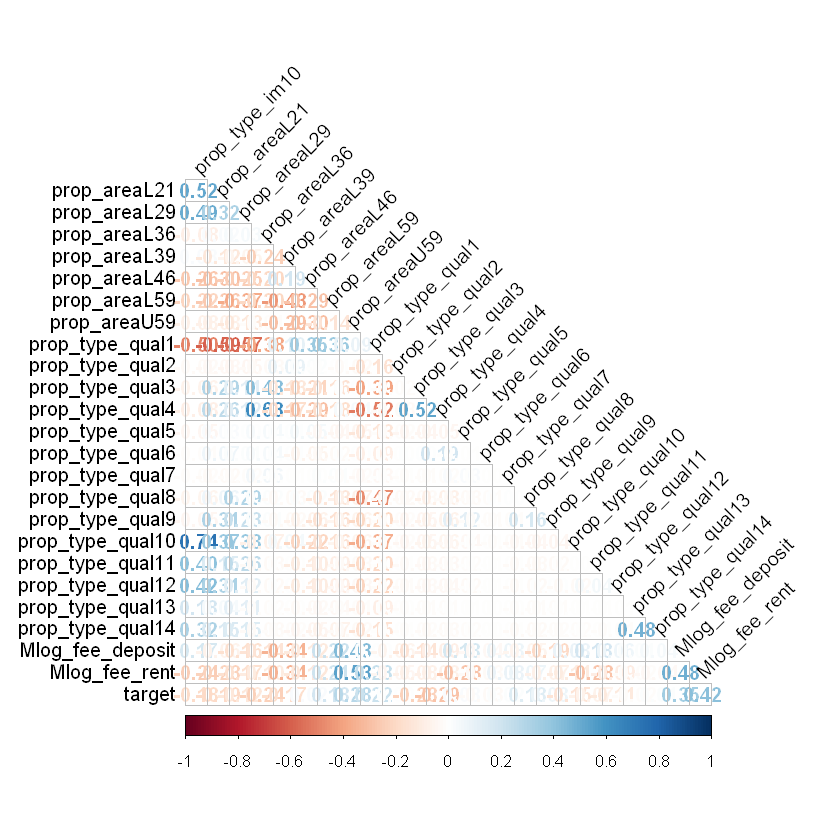

In [346]:
library(corrplot)
corrplot(cor.train, method="number",  type = "lower" ,addCoef.col = "black" ,  tl.col = "black", tl.srt = 45, diag = F) 

# 3. Modeling

## 3-1. 다중 선형 회귀(Multiple Linear Regression)

### 1) 모형 적합

In [226]:
train.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train)

<span style="font-size:110%; background:floralwhite; color:red">잔차 진단</span>

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"

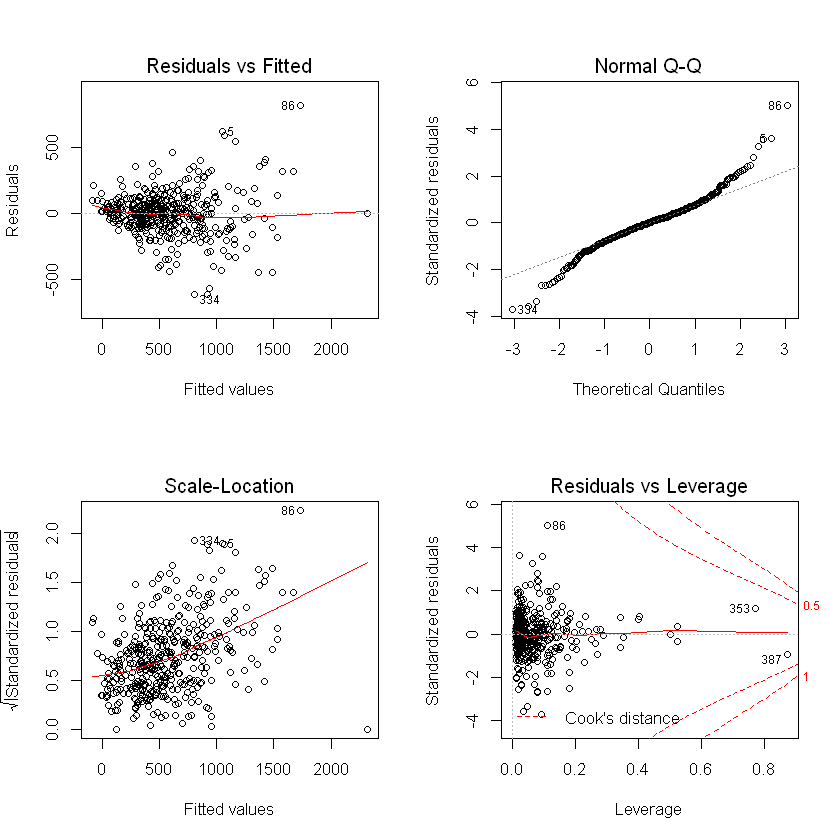

In [229]:
par(mfrow=c(2,2))
plot(train.lm)

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 359"Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 359"

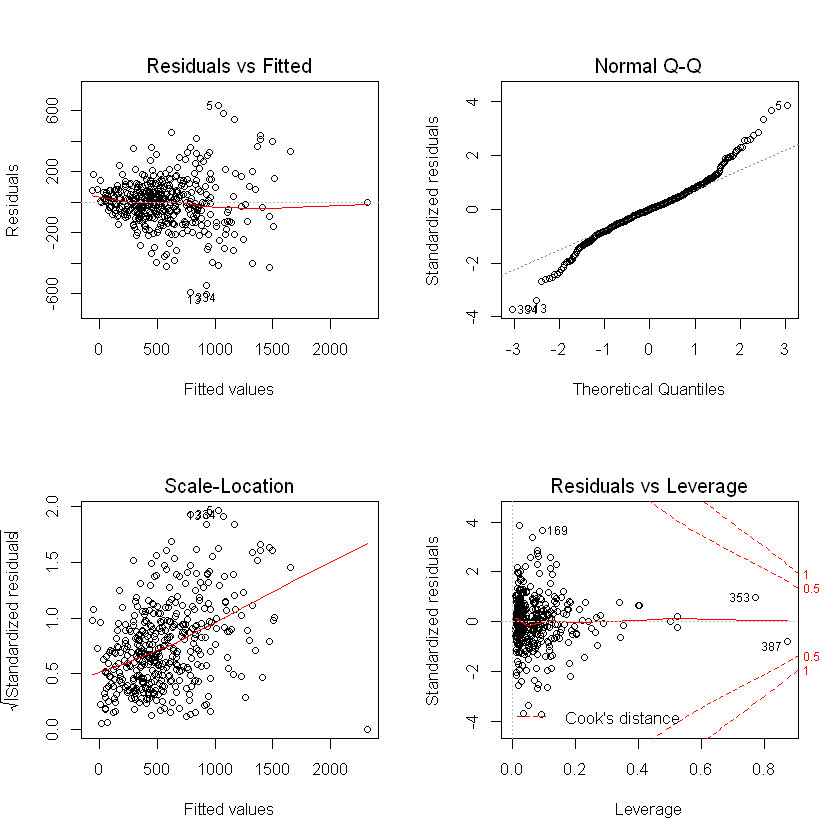

In [231]:
train0<-train[-86,]
train0.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train0)
par(mfrow=c(2,2))
plot(train0.lm)

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"

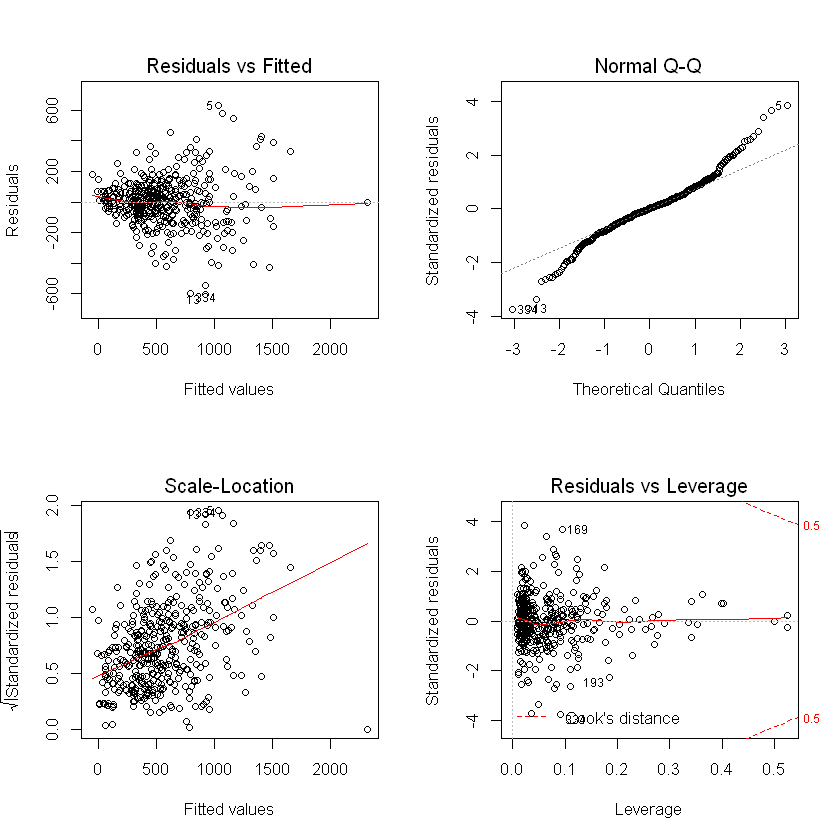

In [232]:
train1<-train[-c(86,353,387),]
train1.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train1)
par(mfrow=c(2,2))
plot(train1.lm)

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 357"Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 357"

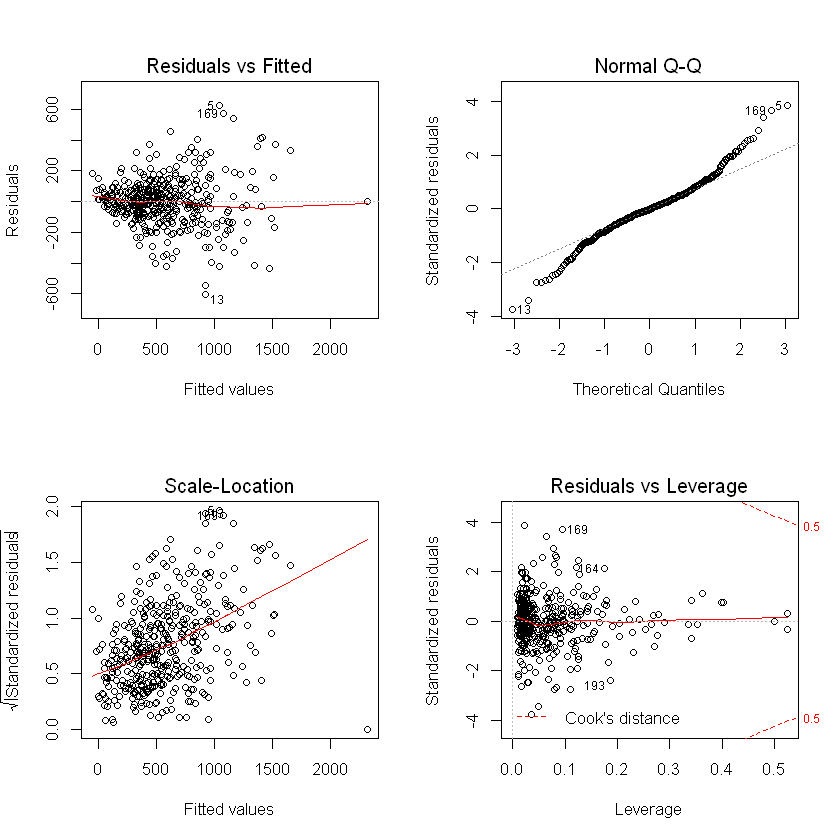

In [236]:
train2<-train[-c(86,353,387,334),]
train2.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train2)
par(mfrow=c(2,2))
plot(train2.lm)

- 3번 그래프 때문에 두번째는 셀렉션 먼저 할 예정

<span style="font-size:110%">`변수선택`</span>

In [237]:
step.backward = step(train1.lm, direction='backward')  # AIC=4368.59
#target ~ region + num_empty + num_park + prop_type_im1 + prop_type_im2 +
#    prop_type_im8 + prop_type_qual6 + prop_areaL39 + prop_areaL59

Start:  AIC=4403.75
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 + prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + 
    prop_type_qual6 + prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + 
    prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + 
    prop_type_qual13 + prop_type_qual14 + prop_areaL21 + prop_areaL29 + 
    prop_areaL36 + prop_areaL39 + prop_areaL46 + prop_areaL59 + 
    prop_areaU59 + M_fee_deposit + M_fee_rent


Step:  AIC=4403.75
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 +

In [239]:
step.stepwise = step(train1.lm, direction='both') # AIC=4368.07

#target ~ region + num_empty + num_park + prop_type_im1 + prop_type_im2 + 
   # prop_type_im8 + prop_type_qual6 + prop_areaL39 + prop_areaL59 + 
    #prop_areaL21 + prop_areaL36

Start:  AIC=4403.75
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 + prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + 
    prop_type_qual6 + prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + 
    prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + 
    prop_type_qual13 + prop_type_qual14 + prop_areaL21 + prop_areaL29 + 
    prop_areaL36 + prop_areaL39 + prop_areaL46 + prop_areaL59 + 
    prop_areaU59 + M_fee_deposit + M_fee_rent


Step:  AIC=4403.75
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 +

In [240]:
step.stepwise = step(train1.lm, direction='forward')

Start:  AIC=4403.75
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 + prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + 
    prop_type_qual6 + prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + 
    prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + 
    prop_type_qual13 + prop_type_qual14 + prop_areaL21 + prop_areaL29 + 
    prop_areaL36 + prop_areaL39 + prop_areaL46 + prop_areaL59 + 
    prop_areaU59 + M_fee_deposit + M_fee_rent



In [242]:
train.step.forward.BIC = step(lm(target ~ 1, train1),
list(upper = ~ target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
     , train1), direction='both', k=log(427))   #BIC=4400.47

Start:  AIC=5083.83
target ~ 1

                   Df Sum of Sq      RSS    AIC
+ num_park          1  44815879 17549072 4548.4
+ tot_pop           1  19123171 43241781 4933.5
+ M_fee_rent        1  11437716 50927236 5003.4
+ prop_type_im2     1   9672593 52692359 5017.9
+ type_new          1   7661465 54703487 5033.9
+ prop_type_im8     1   7578736 54786216 5034.6
+ prop_type_im1     1   6202623 56162328 5045.2
+ M_fee_deposit     1   6154935 56210017 5045.5
+ prop_areaU59      1   5579556 56785396 5049.9
+ prop_type_qual4   1   5531926 56833025 5050.2
+ prop_type_qual3   1   4442187 57922765 5058.3
+ prop_areaL36      1   3988154 58376797 5061.7
+ prop_type_qual1   1   3875971 58488981 5062.5
+ prop_areaL59      1   2742978 59621973 5070.7
+ prop_areaL21      1   2401706 59963245 5073.1
+ num_empty         1   2094454 60270498 5075.3
+ prop_areaL39      1   1955623 60409329 5076.3
+ prop_type_im10    1   1680113 60684839 5078.2
+ prop_areaL29      1   1601108 60763843 5078.8
+ prop_t

- STEPWISE='BOTH'선택
- 최종모형 : target ~ region + num_empty + num_park + prop_type_im1 + prop_type_im2 + 
   prop_type_im8 + prop_type_qual6 + prop_areaL39 + prop_areaL59 + prop_areaL21 + prop_areaL36

In [243]:
final.lm<-lm(target ~ region + num_empty + num_park + prop_type_im1 + prop_type_im2 + prop_type_im8 + prop_type_qual6 + prop_areaL39 + prop_areaL59 + prop_areaL21 + prop_areaL36, train1)

<span style="font-size:110%; background:floralwhite; color:red">반복 수행하며 최적 모형 탐색</span>

In [338]:
getwd()

[1] "C:/dacon/re"

In [339]:
daci<-read.table("train0723(5).3.csv", sep=',', header=T)

daci.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, daci)

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"

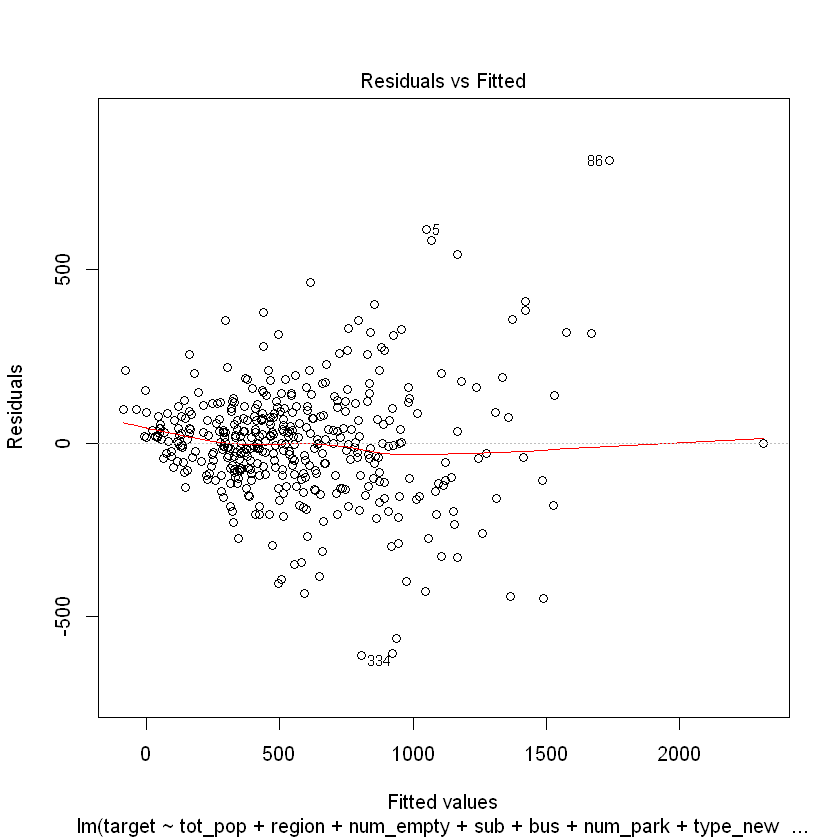

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"

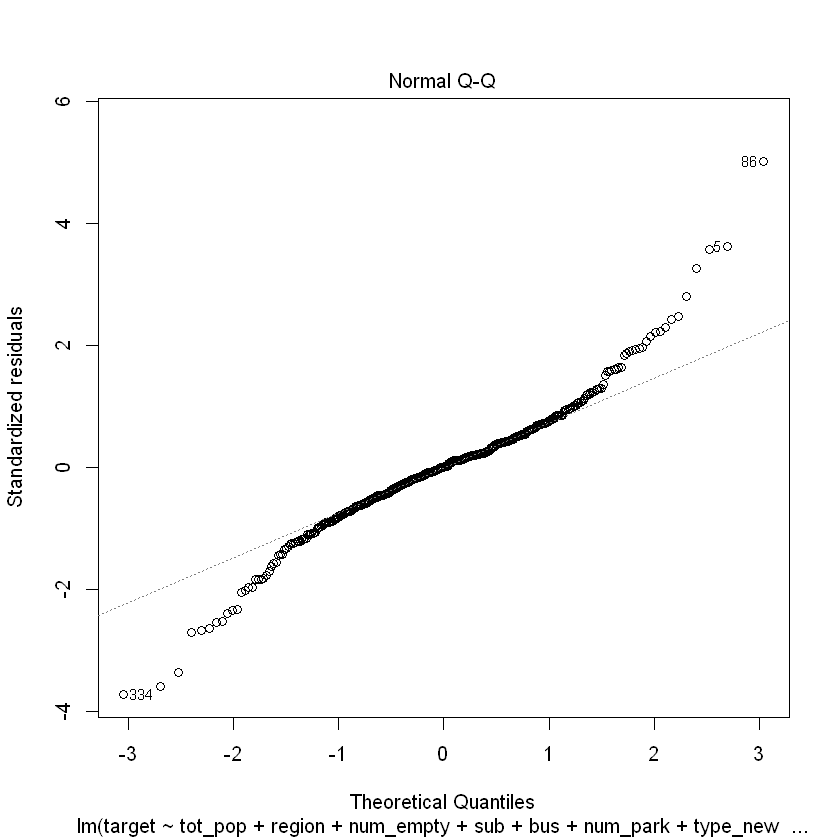

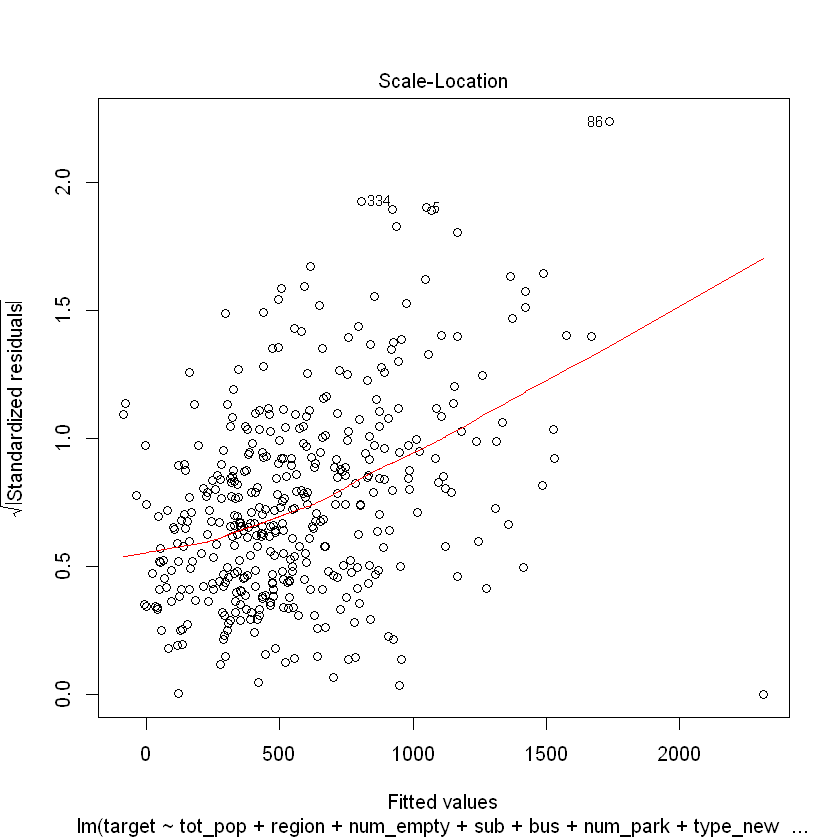

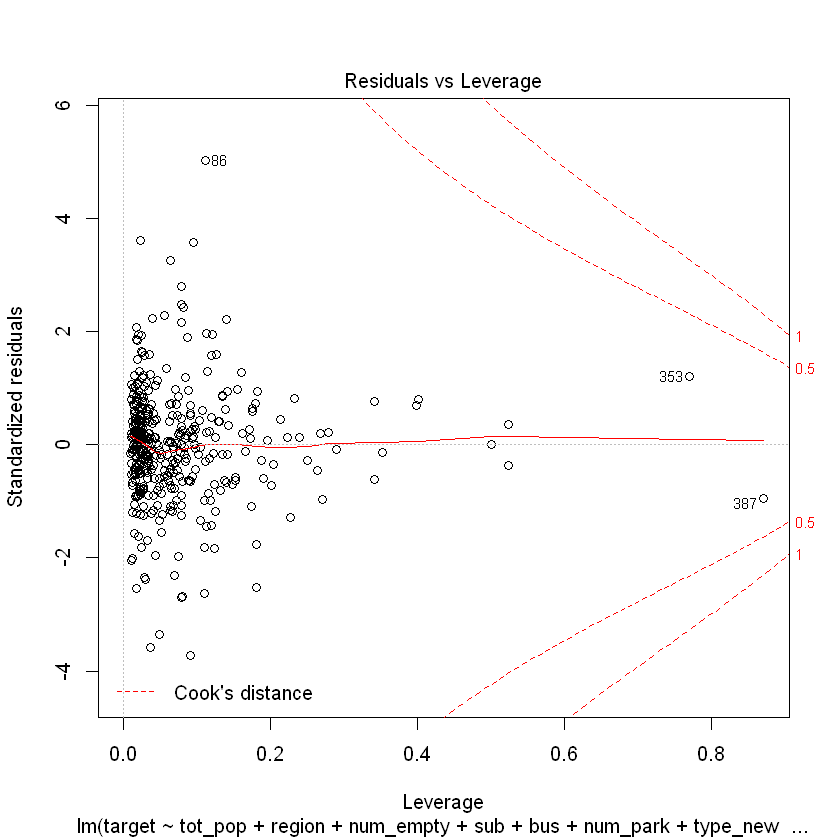

In [340]:
plot(daci.lm)

In [343]:
daci1<-daci[-c(353,387),]
daci1.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, daci1)

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 330, 359"

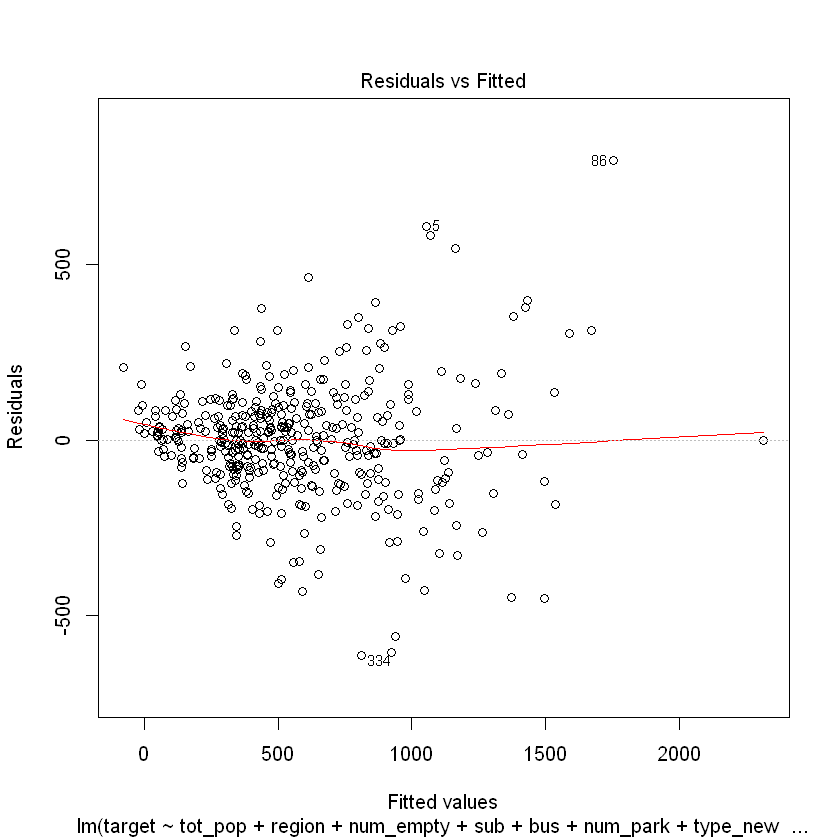

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 330, 359"

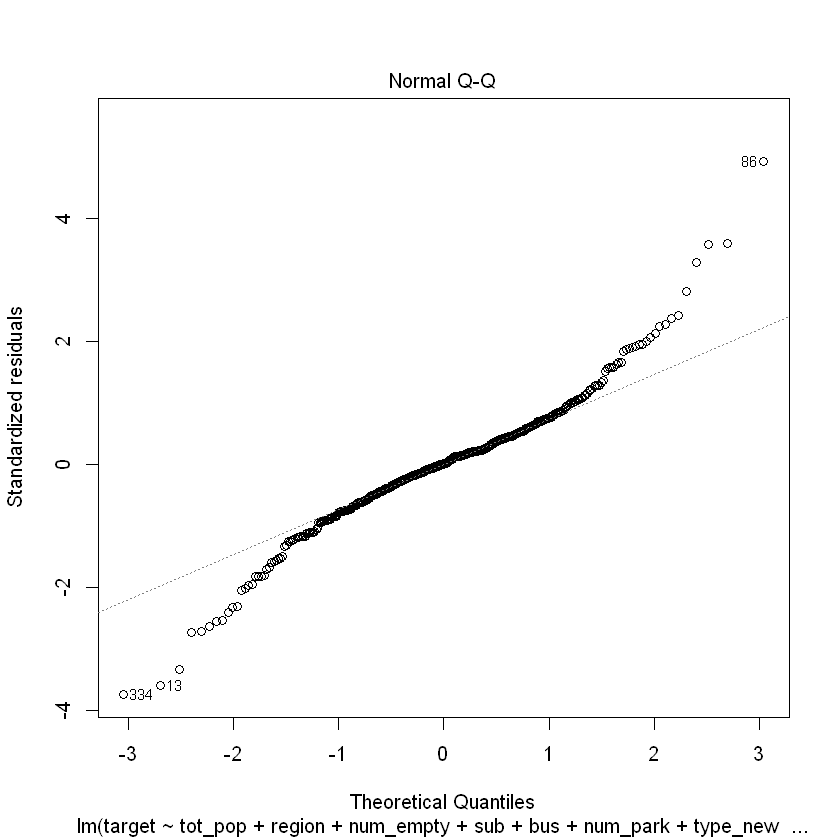

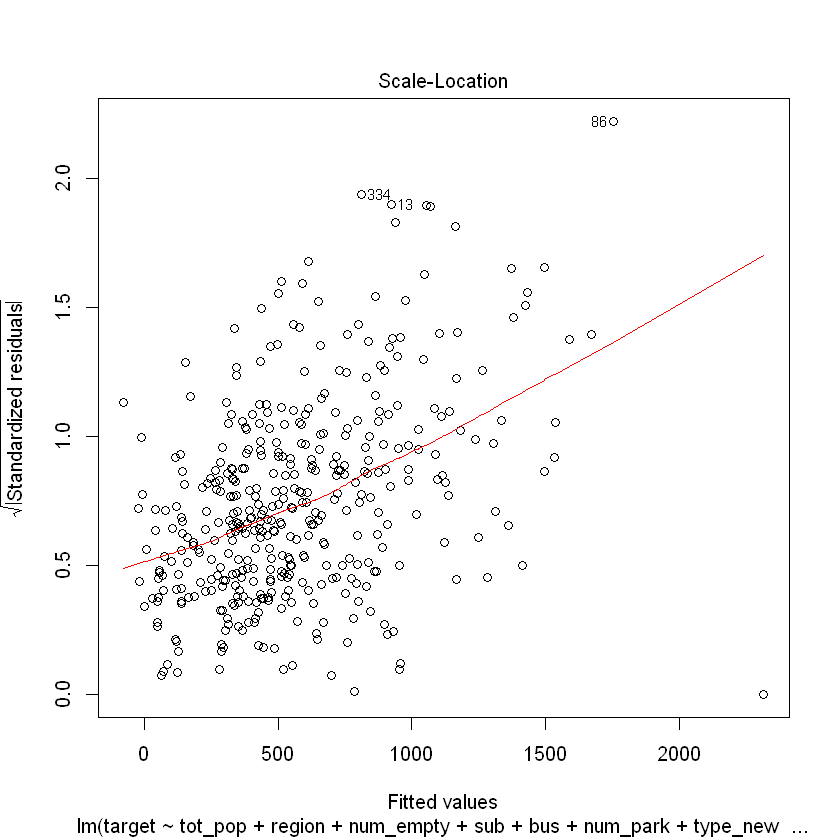

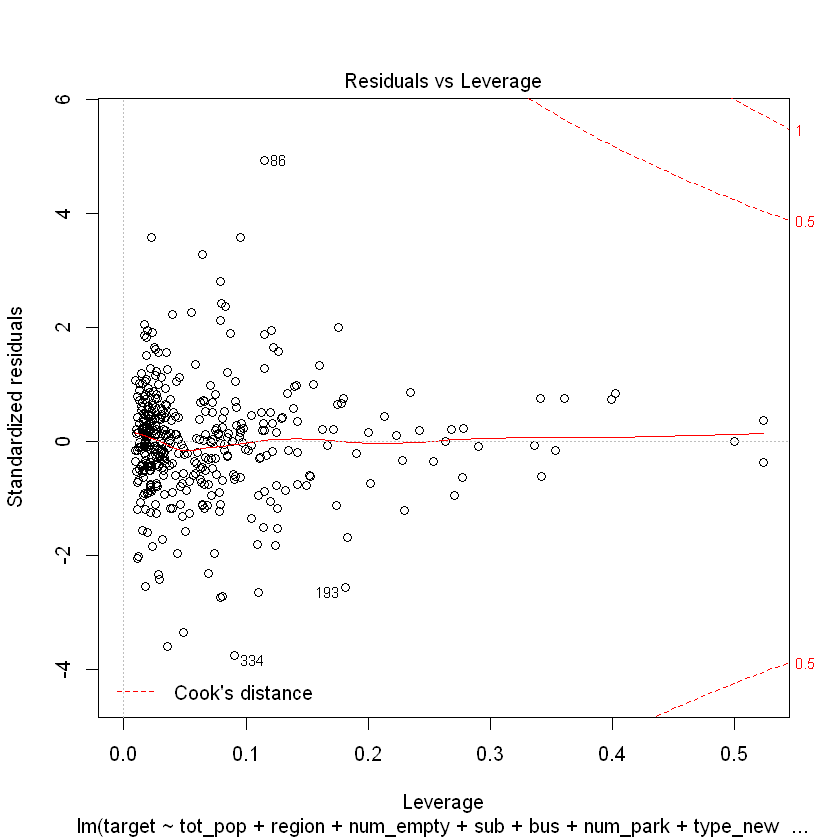

In [344]:
plot(daci1.lm)

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"

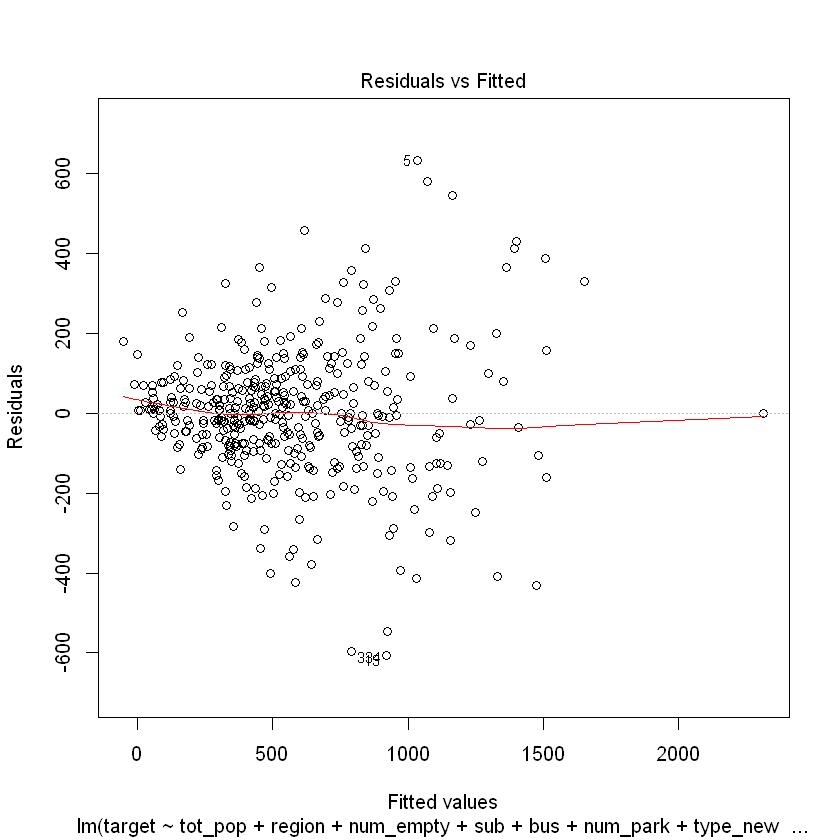

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"

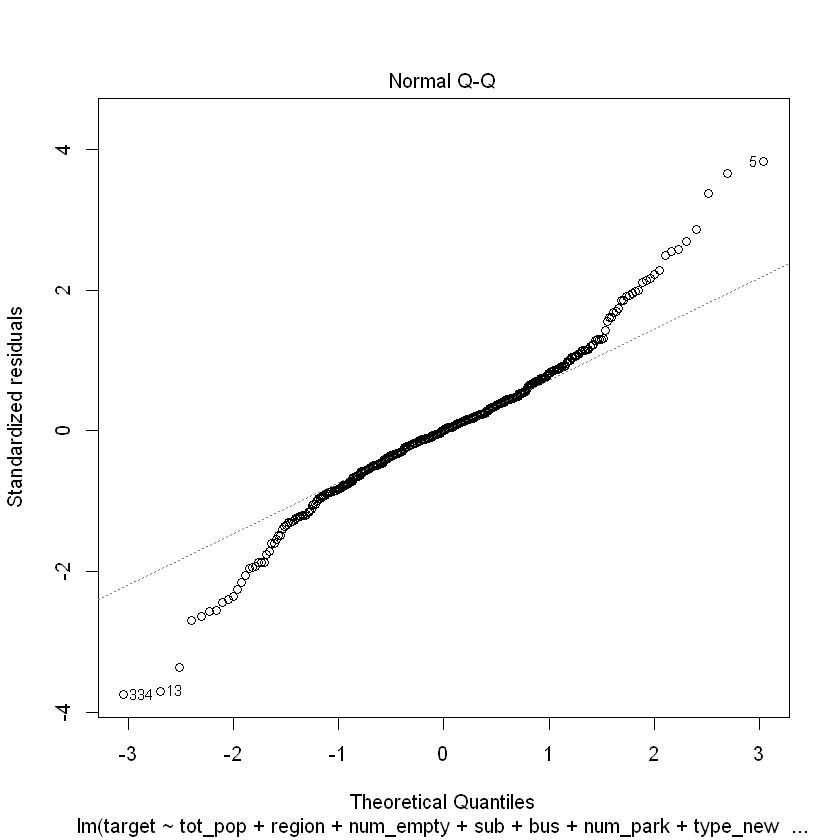

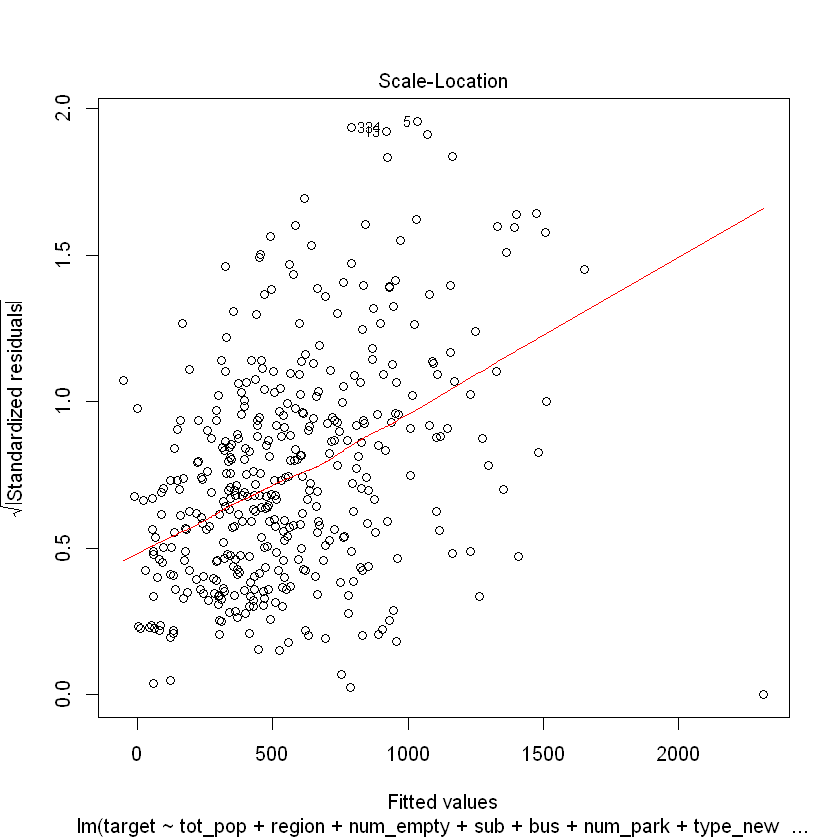

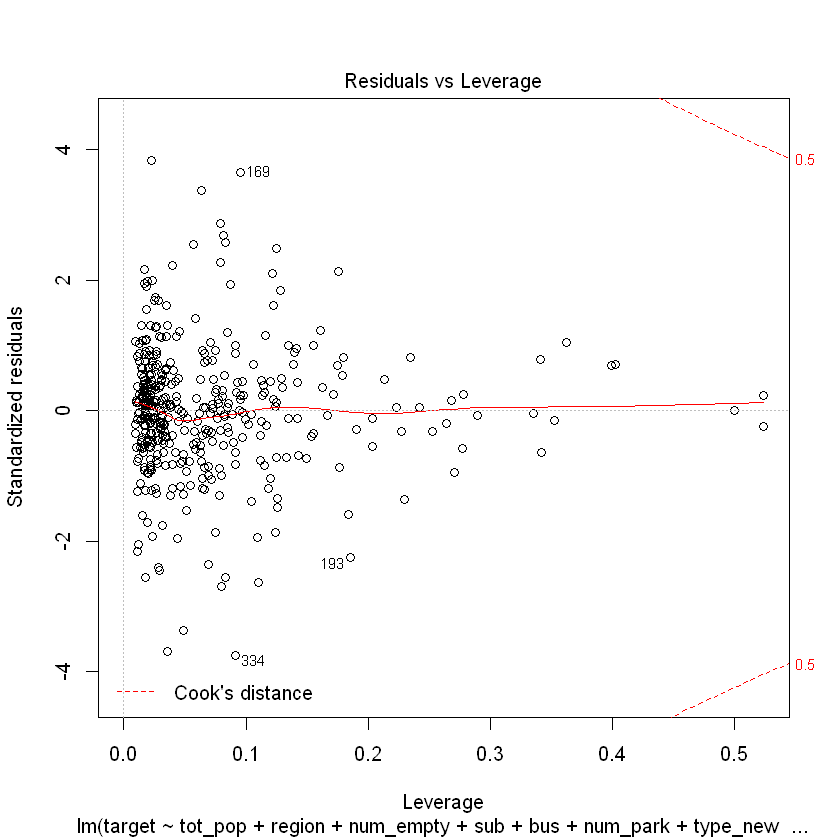

In [345]:
daci2<-daci[-c(353,387,86),]
daci2.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, daci2)
plot(daci2.lm)

Warning message:
"not plotting observations with leverage one:
  10, 67, 116, 238, 290, 315"Warning message:
"not plotting observations with leverage one:
  10, 67, 116, 238, 290, 315"

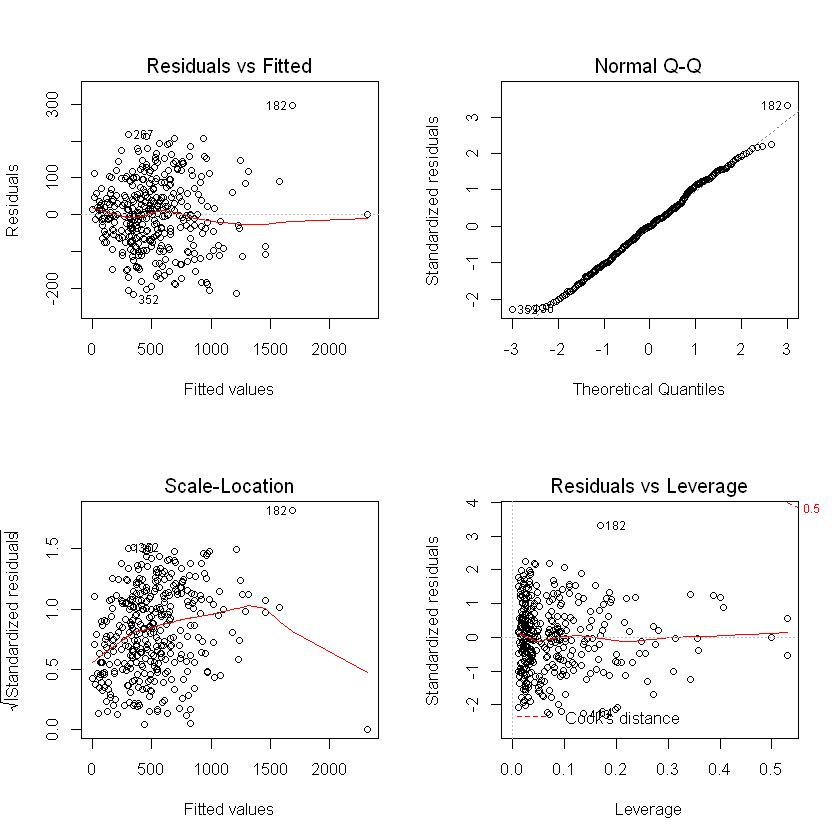

In [445]:
daci2<-daci[-c(353,387,86,5,334,13,169,414,32,218,4,22,347,412,220,421,422,242,58,164,320,338,45,117,377,46,193,101,24,96,394
             ,103,191,107,124,399,97,98,151,401,402,126,354,369,328,73,57,312,405,34,12,246,264,180,153,69,253),]
daci2.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, daci2)
par(mfrow=c(2,2))
plot(daci2.lm)

Warning message:
"not plotting observations with leverage one:
  9, 62, 105, 207, 254, 274"Warning message:
"not plotting observations with leverage one:
  9, 62, 105, 207, 254, 274"

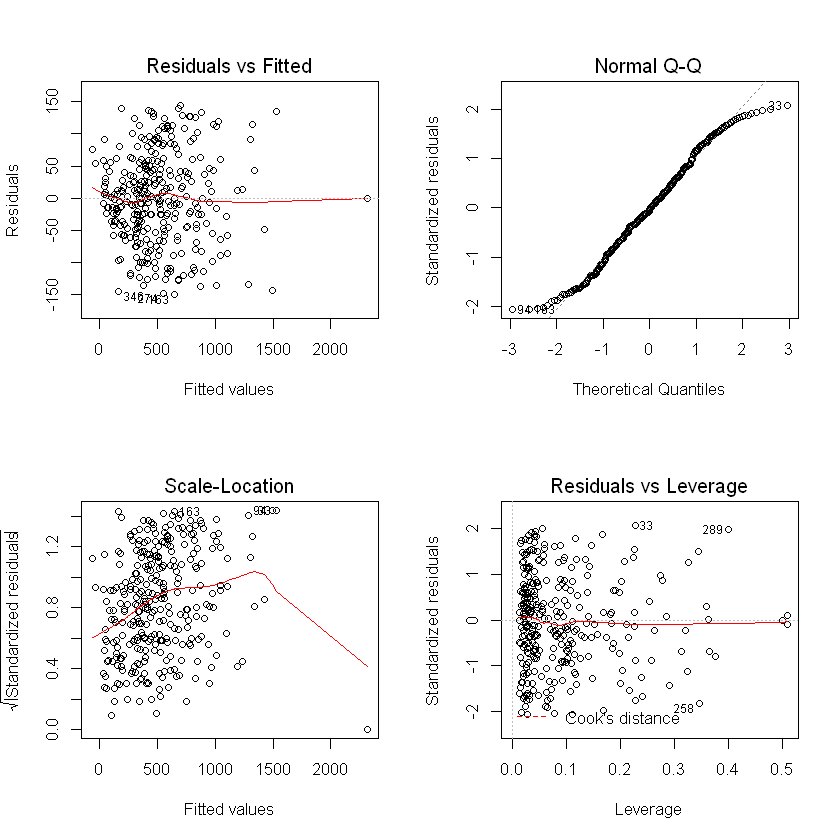

In [513]:
daci3<-daci[-c(353,387,86,5,334,13,169,414,32,218,4,22,347,412,220,421,422,242,58,164,320,338,45,117,377,46,193,101,24,96,394
             ,103,191,107,124,399,97,98,151,401,402,126,354,369,328,73,57,312,405,34,12,246,264,180,153,69,253
              , 130, 352, 131, 267,182,175,413,125,339,255,189,139,362,247,375,187,23,79,195,236,252,176,208,379,376,299,138
              ,7,311,207,281,411,317,221,325,340,344,170,238,166,116,204,196,21,355,396,265,373,18),]
daci3.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im1+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual6+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, daci3)
par(mfrow=c(2,2))
plot(daci3.lm)

In [514]:
daci3.step.backward = step(daci3.lm, direction='backward') #Step:  AIC=3106.54

Start:  AIC=2821.79
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 + prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + 
    prop_type_qual6 + prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + 
    prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + 
    prop_type_qual13 + prop_type_qual14 + prop_areaL21 + prop_areaL29 + 
    prop_areaL36 + prop_areaL39 + prop_areaL46 + prop_areaL59 + 
    prop_areaU59 + M_fee_deposit + M_fee_rent


Step:  AIC=2821.79
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 +

In [515]:
daci3.step.backward = step(daci3.lm, direction='both') #AIC=3105.95
                 

Start:  AIC=2821.79
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 + prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + 
    prop_type_qual6 + prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + 
    prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + 
    prop_type_qual13 + prop_type_qual14 + prop_areaL21 + prop_areaL29 + 
    prop_areaL36 + prop_areaL39 + prop_areaL46 + prop_areaL59 + 
    prop_areaU59 + M_fee_deposit + M_fee_rent


Step:  AIC=2821.79
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im3 + 
    prop_type_im4 + prop_type_im5 + prop_type_im6 + prop_type_im7 + 
    prop_type_im8 + prop_type_im9 + prop_type_im10 + prop_type_qual1 + 
    prop_type_qual2 +

target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im1 + prop_type_im2 + prop_type_im4 + 
    prop_type_im5 + prop_type_qual6 + prop_type_qual10 + prop_areaL46 + 
    prop_areaL59 + M_fee_deposit + prop_type_qual14

In [474]:
daci3.lm<-lm(target ~ tot_pop + region + num_empty + sub + bus + num_park + type_new + prop_type_im1 + prop_type_im2 + prop_type_im4 + prop_type_im5 + prop_type_qual6 + prop_type_qual10 + prop_areaL46 + prop_areaL59 + M_fee_deposit + prop_type_qual14,daci3)

In [519]:
test.daci<-read.table("test0723.fi.csv", sep=',', header=T)   

In [521]:
predict.daci<-predict(daci3.lm, newdata=test.daci)

ERROR: Error in eval(predvars, data, env): 객체 'prop_type_im4'를 찾을 수 없습니다


In [480]:
write.csv(predict.daci, "predict.daci.csv", row.names=F)

target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    prop_type_im1 + prop_type_im2 + prop_type_im4 + prop_type_im6 + 
    prop_type_im7 + prop_type_qual3 + prop_type_qual6 + prop_type_qual10 + 
    prop_type_qual11 + prop_type_qual12 + prop_areaL21 + prop_areaL39 + 
    prop_areaL46 + prop_areaL59 + M_fee_deposit

In [516]:
daci3.lm<-lm(target ~ tot_pop + region + num_empty + sub + bus + num_park + prop_type_im1 + prop_type_im2 + prop_type_im4 + prop_type_im6 + prop_type_im7 + prop_type_qual3 + prop_type_qual6 + prop_type_qual10 + prop_type_qual11 + prop_type_qual12 + prop_areaL21 + prop_areaL39 + prop_areaL46 + prop_areaL59 + M_fee_deposit, daci3)

In [522]:
predict.daci<-predict(daci3.lm, newdata=test.daci)

ERROR: Error in eval(predvars, data, env): 객체 'prop_type_im4'를 찾을 수 없습니다


In [518]:
write.csv(predict.daci, "predict.daci(2).csv", row.names=F)

### 2) Test Set에 전처리 과정 적용

In [356]:
test<-read.table("test0722.csv", sep=',', header=T)
summary(test)

      code        tot_pop          type_as           region     
 C2676  : 46   Min.   :  75.0   Min.   :0.0000   Min.   : 1.00  
 C2253  : 31   1st Qu.: 488.0   1st Qu.:0.0000   1st Qu.: 2.00  
 C1006  : 27   Median : 745.0   Median :0.0000   Median : 5.00  
 C1812  : 27   Mean   : 862.1   Mean   :0.1732   Mean   : 6.28  
 C1729  : 25   3rd Qu.:1161.0   3rd Qu.:0.0000   3rd Qu.:11.00  
 C2033  : 25   Max.   :2572.0   Max.   :1.0000   Max.   :16.00  
 (Other):841                                                    
    type_im            area           area_pop        num_empty    
 Min.   : 2.000   Min.   :  9.96   Min.   :   1.0   Min.   : 0.00  
 1st Qu.: 6.000   1st Qu.: 33.13   1st Qu.:  14.0   1st Qu.: 6.00  
 Median : 6.000   Median : 39.72   Median :  60.0   Median :15.00  
 Mean   : 6.695   Mean   : 43.71   Mean   : 100.4   Mean   :15.54  
 3rd Qu.: 8.000   3rd Qu.: 47.40   3rd Qu.: 140.0   3rd Qu.:23.00  
 Max.   :10.000   Max.   :583.40   Max.   :1341.0   Max.   :45.00  
    

In [120]:
#포텐셜 아웃라이어처리 및 로그트랜스포매이션 

[,1]
[1,]   75
[2,]  488
[3,]  745
[4,] 1161
[5,] 1974
attr(,"class")
        1 
"integer"

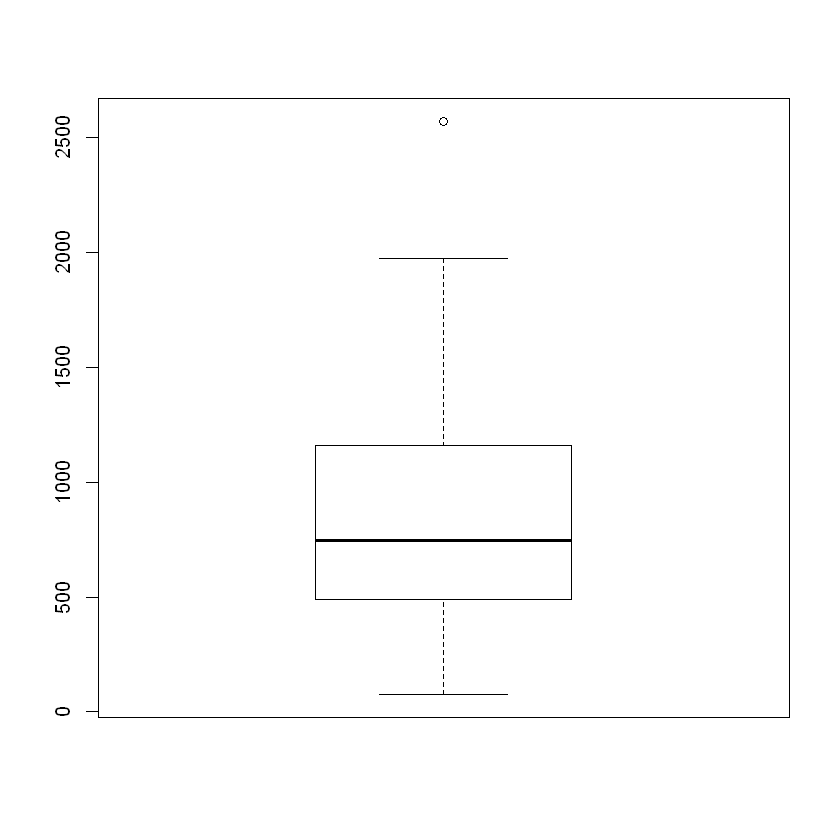

In [357]:
boxplot(test$tot_pop)$stats

In [170]:
quantile (test$ tot_pop, probs=c(0.9, 0.94,0.95, 0.955,0.96,0.97,0.98,0.99,1))

90%     94%     95%   95.5%     96%     97%     98%     99%    100% 
1400.00 1505.00 1974.00 2006.89 2572.00 2572.00 2572.00 2572.00 2572.00

In [358]:
test$ tot_pop<-ifelse(test$ tot_pop>=2006.88999999997, 2007,test$ tot_pop )

[,1]
[1,]    0
[2,]    6
[3,]   15
[4,]   23
[5,]   45
attr(,"class")
        1 
"integer"

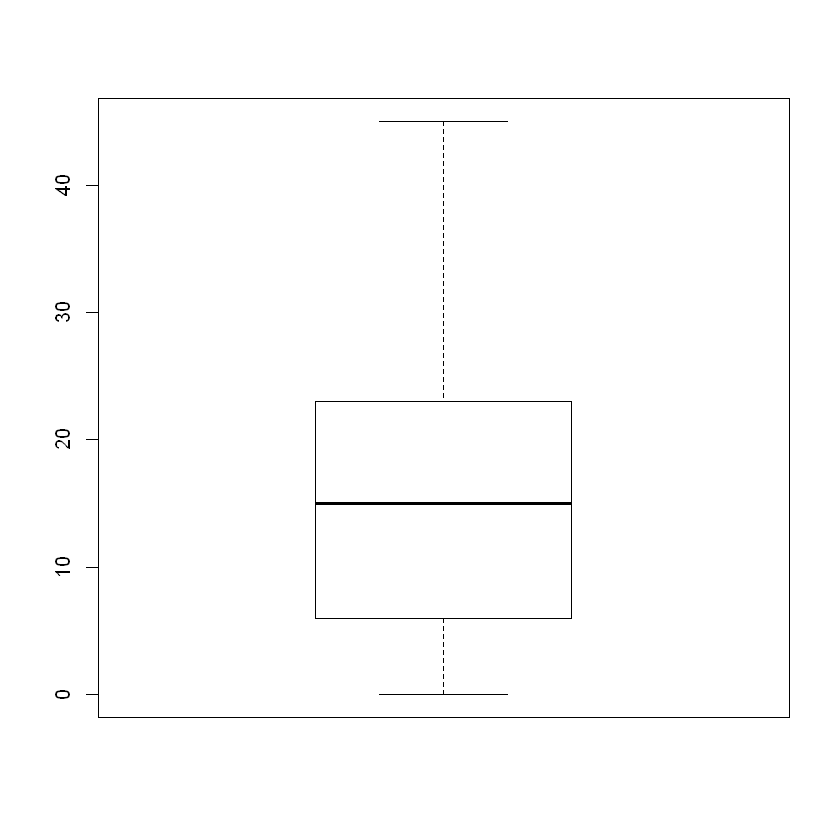

In [172]:
boxplot(test$num_empty)$stats   # 이상없음

2249000
14863000
21478000
31242000
55275000


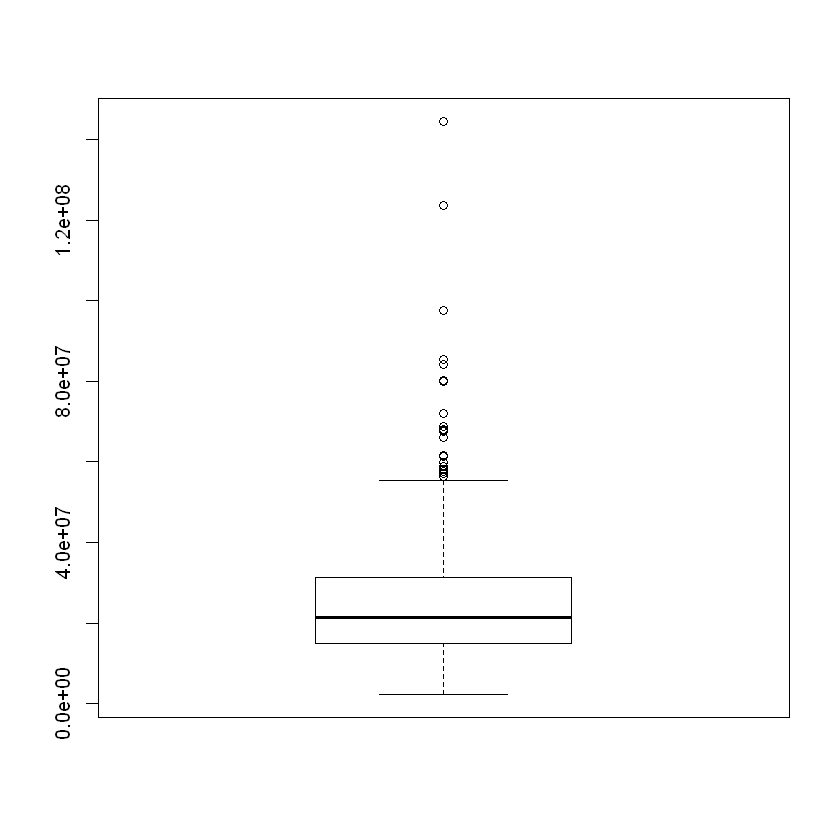

In [173]:
boxplot(test$fee_deposit)$stats

In [359]:
test$log_fee_deposit<-log (test$fee_deposit)

15.42675
16.51439
16.88254
17.25727
18.26270


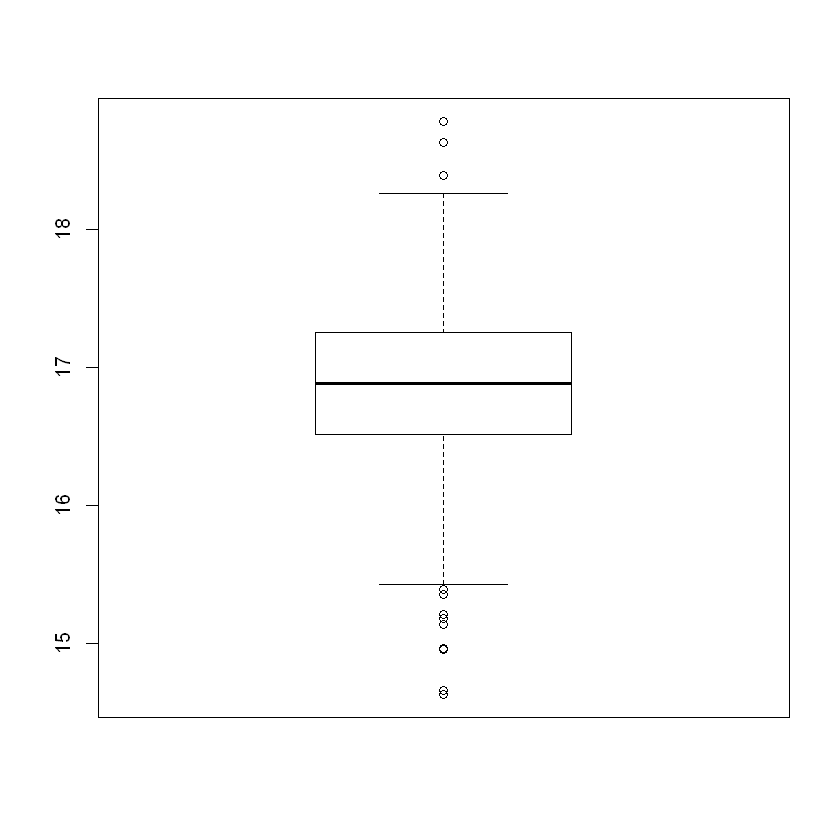

In [175]:
boxplot(test$log_fee_deposit)$stats

In [185]:
quantile( test$log_fee_deposit , c(0.01, 0.015,0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1))

1%     1.5%       2%      10%      20%      30%      40%      50% 
15.13219 15.19083 15.39056 16.07069 16.43517 16.58836 16.73765 16.88254 
     60%      70%      80%      90%      95%      99%     100% 
17.01690 17.16190 17.34798 17.61447 17.85893 18.24842 18.24842

In [360]:
test$log_fee_deposit<-ifelse(test$log_fee_deposit>=18.2484204029527, 18.2484204029527, test$log_fee_deposit)   #0.99
test$log_fee_deposit<-ifelse(test$log_fee_deposit<=15.1321868522033, 15.1321868522033, test$log_fee_deposit)#0.01

In [186]:
table(test$log_fee_deposit)


15.1321868522033 15.1821122857384 15.2097730887333 15.3543113907989 
              15                1                3                1 
15.3905640435365 15.4267468523398  15.571124580556 15.5921563893823 
               3                5                5                2 
15.6353714573032 15.6866971608237 15.7149279018988 15.7429657426462 
               1                4                1                2 
15.7431112501037 15.7444198653396 15.7602771963175 15.7875060774953 
               2                4                2                3 
 15.792919374079 15.8140131571388 15.8395715162913 15.8620414361868 
               1                1                2                2 
15.8696342916598 15.8757692802273 15.9011826493947 15.9053973575056 
               1                2                2                2 
15.9089782713772 15.9430277228757 15.9449320319491 15.9675052923258 
               3                1                1                4 
15.9753793487567 15.9831918884935

15.42675
16.51439
16.88254
17.25727
18.24842


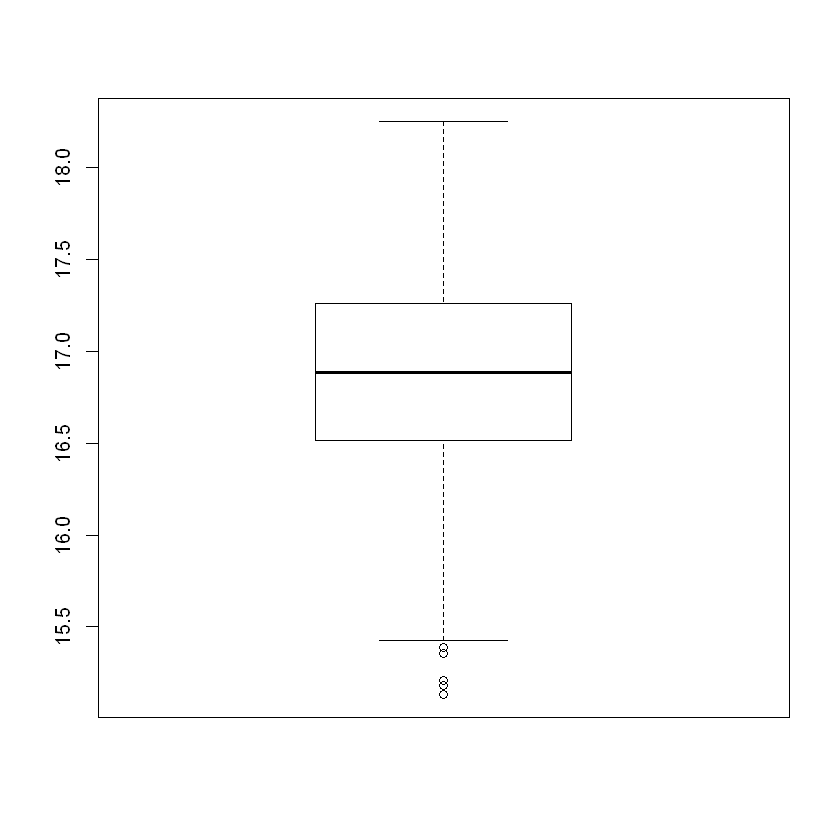

In [361]:
boxplot(test$log_fee_deposit)$stats

17420
110620
153180
217960
370790


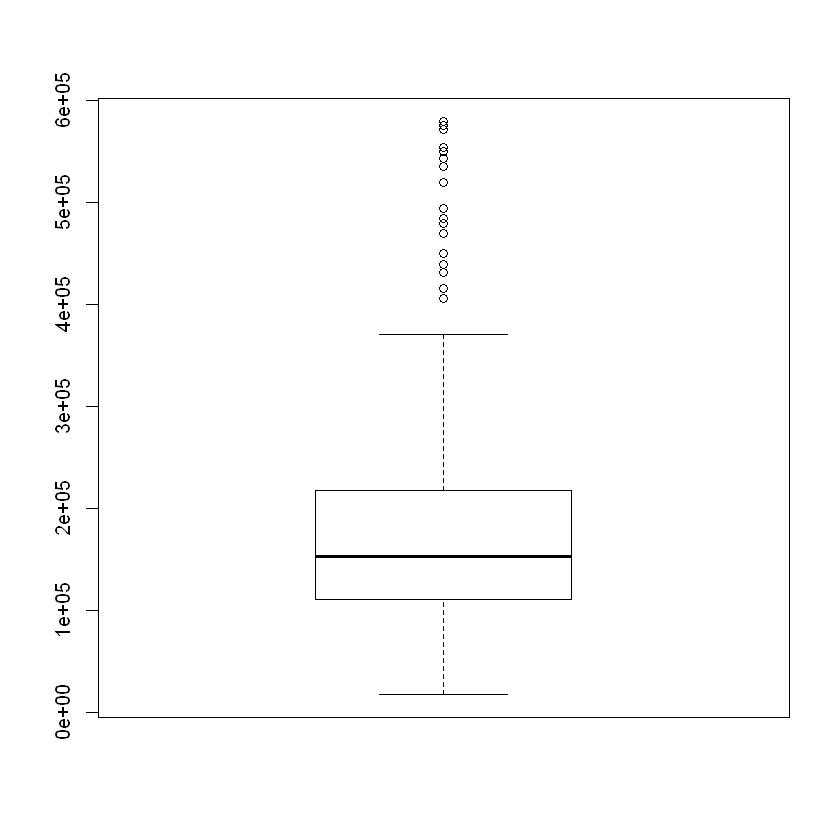

In [187]:
boxplot(test$fee_rent)$stats

In [362]:
test$log_fee_rent<-log(test$ fee_rent)

10.63537
11.61386
11.93937
12.29207
13.27078


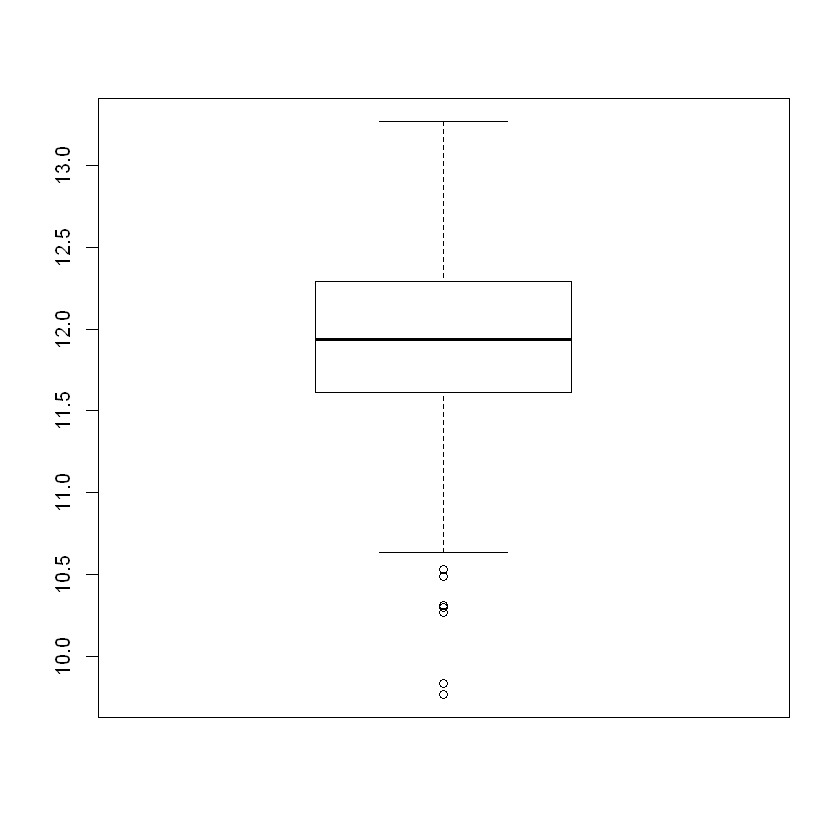

In [190]:
boxplot(test$log_fee_rent)$stats

In [195]:
quantile(test$log_fee_rent, probs=c(0.01, 0.02, 0.1, 0.2, 0.3, 0.1, 0.2, 0.9, 0.99,1))

1%       2%      10%      20%      30%      10%      20%      90% 
10.30156 10.68807 11.33990 11.52438 11.68969 11.33990 11.52438 12.60786 
     99%     100% 
13.20670 13.27078

In [363]:
test$log_fee_rent<-ifelse(test$log_fee_rent<=10.3102851058781, 10.3102851058781, test$log_fee_rent)   #0.01 

10.63537
11.61386
11.93937
12.29207
13.27078


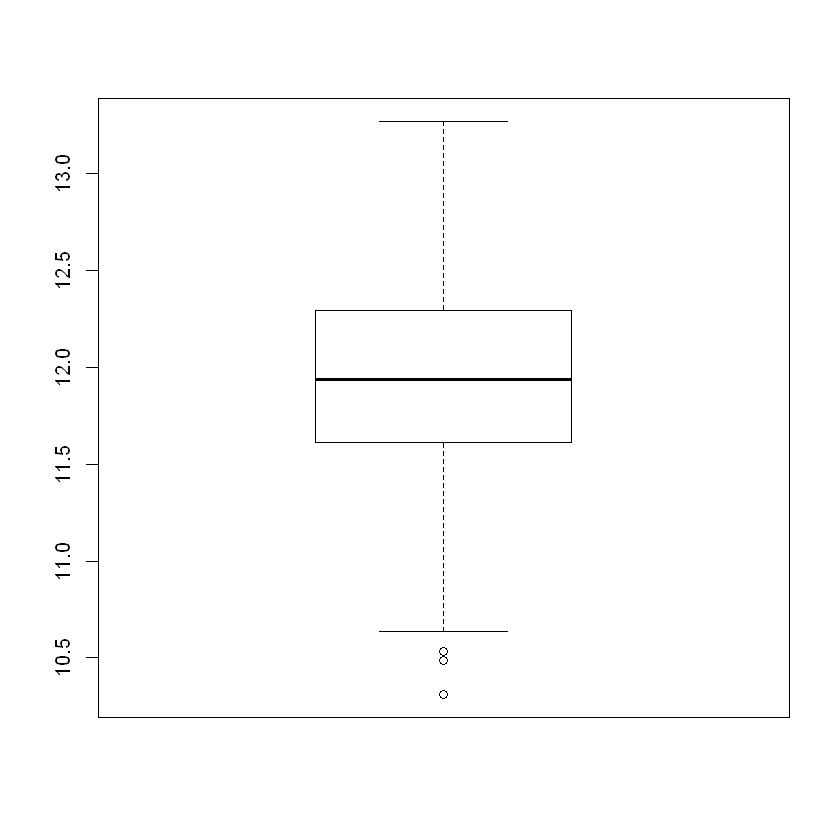

In [204]:
boxplot(test$log_fee_rent)$stats

In [202]:
table(test$log_fee_rent)


10.3015586573152 10.3102851058781 10.4848648322531 10.5312958917877 
              11                1                1                1 
 10.635374561412  10.639454730279 10.6880737934129 10.7025700835047 
               2                2                5                2 
 10.709293551235 10.8356516335666 10.8483657412622 10.9927226793916 
               1                3                1                1 
11.0186291431554 11.0499371706184 11.0733346421327 11.0807569740275 
               1                4                1                1 
11.1099073605051 11.1288793242354 11.1453340092901 11.1548209282219 
               2                3                1                2 
11.1837267123155  11.195883237212 11.1995836457379 11.2118203721863 
               1                1                2                4 
11.2158662307059 11.2233749814584 11.2252433925184  11.228438283415 
               3                3                1                2 
11.2285711826111 11.2344013303032

[,1]
[1,]   29
[2,]  286
[3,]  458
[4,]  711
[5,] 1307
attr(,"class")
        1 
"integer"

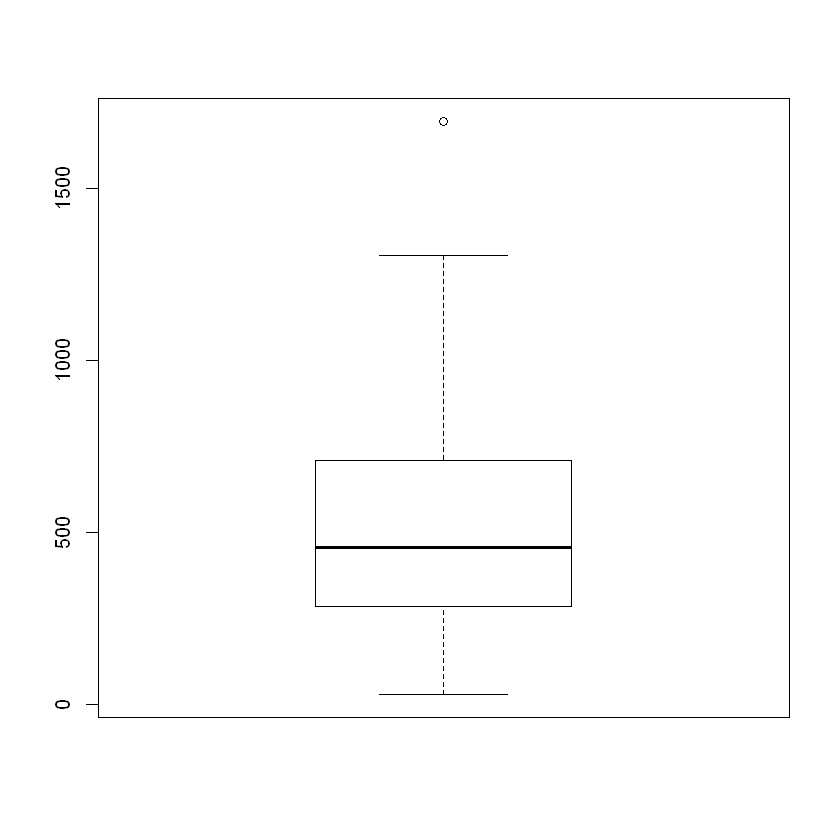

In [364]:
boxplot(test$num_park )$stats

In [219]:
quantile(test$num_park , probs=c(0.1, 0.9, 0.95, 0.97, 0.98,0.9855,0.99, 1))

10%      90%      95%      97%      98%   98.55%      99%     100% 
 173.000 1101.000 1216.000 1222.000 1280.000 1307.000 1549.775 1614.310

In [218]:
table(test$num_park )


              29               40               53               98 
               6                2                5                4 
             107              117              120              131 
               6               22                5               25 
             142              152              159              168 
               4                2                6                3 
             173              185              187              202 
              31               27               25                3 
             210              211              213              226 
               2                8                3                3 
             236              239              250              254 
               4                6                8                2 
             259              265              270              274 
               7                8                8                9 
             278              280

In [365]:
test$num_park<-ifelse(test$num_park>=1614.30999999999, 1614.30999999999, test$num_park)    #  0.99 

29
286
458
711
1307


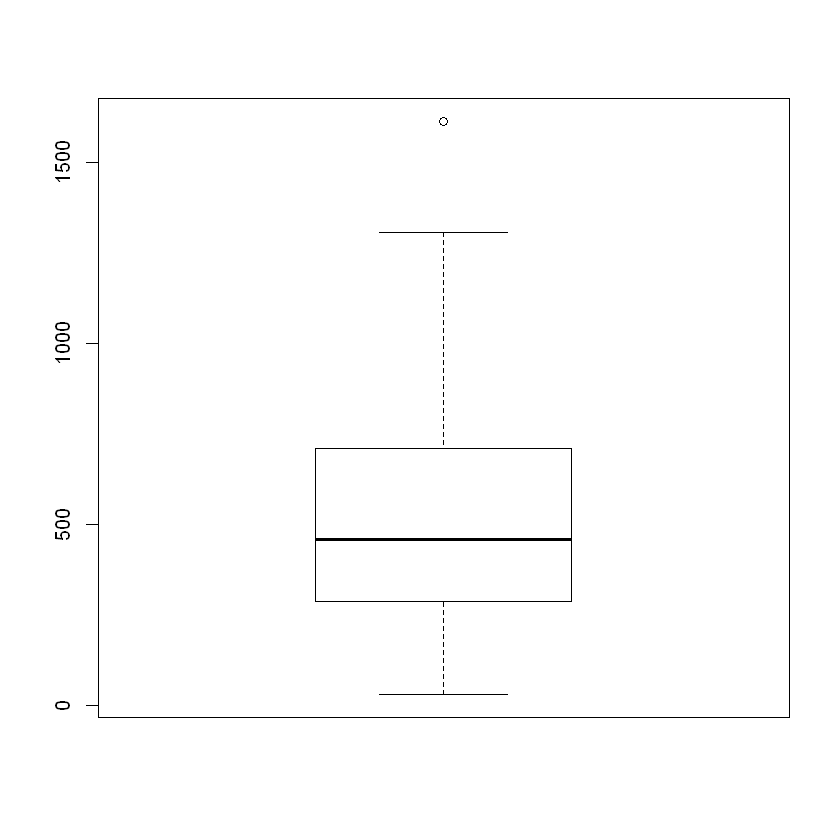

In [213]:
boxplot(test$num_park )$stats

In [366]:
write.csv(test, "test0727.out.csv", row.names=F)

#### type_as 파생변수생성
- type_new 아파트0 아파트+상가 1
- prop_sanga 상가비율

In [367]:
test<-read.table("test0727.out.csv", sep=',', header=T)

In [368]:
table(test$type_as)


  0   1 
845 177 

In [369]:
test2<-test %>% group_by(code)%>% summarise(mean=mean(type_as) )
head(test2,5)

code,mean
C1003,0.0000000
C1006,0.7407407
C1016,0.0000000
C1019,0.0000000
C1030,0.0000000


In [370]:
test<-left_join(test, test2, by='code') 

In [253]:
head(test)

code,tot_pop,type_as,region,type_im,area,area_pop,num_empty,type_qual,fee_deposit,fee_rent,sub,bus,num_park,type_as0,type_as1,mean
C1072,754,0,2,6,39.79,116,14,8,22830000,189840,0,2,683,1,0,0
C1072,754,0,2,6,46.81,30,14,1,36048000,249930,0,2,683,1,0,0
C1072,754,0,2,6,46.90,112,14,8,36048000,249930,0,2,683,1,0,0
C1072,754,0,2,6,46.90,120,14,8,36048000,249930,0,2,683,1,0,0
C1072,754,0,2,6,51.46,60,14,8,43497000,296780,0,2,683,1,0,0
C1072,754,0,2,6,51.71,51,14,8,43497000,296780,0,2,683,1,0,0


In [371]:
test$type_new<-ifelse( test$mean ==0, 0 ,1) 

#### type_im 파생변수 생성
- type_im 원핫인코딩후 prop_type_im 만들기


In [372]:
table(test$type_im)


  2   3   5   6   7   8  10 
 35  13   6 622  45 177 124 

In [373]:
test$type_im2<-ifelse(test$type_im==2,1,0)
test$type_im3<-ifelse(test$type_im==3,1,0)
test$type_im5<-ifelse(test$type_im==5,1,0)
test$type_im6<-ifelse(test$type_im==6,1,0)
test$type_im7<-ifelse(test$type_im==7,1,0)
test$type_im8<-ifelse(test$type_im==8,1,0)
test$type_im10<-ifelse(test$type_im==10,1,0)

In [374]:
test2<-test %>% group_by(code) %>%summarise(prop_type_im2=mean(type_im2)
                                           , prop_type_im3=mean(type_im3)
                                           , prop_type_im5=mean(type_im5)
                                            , prop_type_im6=mean(type_im6)
                                              , prop_type_im7=mean(type_im7)
                                              , prop_type_im8=mean(type_im8)
                                              , prop_type_im10=mean(type_im10)
                                              )


In [375]:
test<-left_join(test, test2, by='code') 

#### area  공급면적 보고 나누기

In [259]:
table(test$area)


  9.96  13.02  13.07  13.59  13.77  14.25     15  16.39  16.42  16.57  16.69 
     1      1      1      1      1      4      6      1      1      3      1 
 16.78   16.8  16.83  16.85  16.87  16.89  16.94  16.95  16.97  17.23  18.38 
     1      3      1      2      1      1      2      5      1      2      6 
 18.54  19.08  19.15  19.32  19.95  20.59   20.9  21.54  21.86  21.92  21.93 
     1      1      1      1      1      2     12      4      2      1      2 
 21.94  21.99  22.28  22.59  22.86  22.89  22.91  23.25  23.35   23.4  23.79 
     3      5      1      1      2      2      1      1      3      4      2 
 23.86  24.19  24.54  24.59  24.66  24.72  24.76  24.83  24.87  24.99  26.11 
     2      1      1      1      1      1      1      1      1      2      1 
 26.12  26.17  26.25  26.32  26.34  26.37  26.41  26.44  26.47  26.51  26.52 
     2      4      6      1      2     14      4      4      1      2      1 
 26.56  26.59   26.6  26.65  26.66  26.73  26.75  26.76  26.78 

In [376]:
test$area<-ifelse(test$area>84.99, 84.99, test$area)

In [377]:
test$areaL21<-ifelse(test$area<=24.98, 1, 0)
test$areaL29<-ifelse( test$area>24.98   &  test$area<=29.99, 1, 0)
test$areaL36<-ifelse(test$area>29.99& test$area<35.91, 1, 0)
test$areaL39<-ifelse(test$area>=35.91 & test$area<=39.99, 1, 0)
test$areaL46<-ifelse(test$area>39.99 & test$area<=49.99, 1, 0)
test$areaL59<-ifelse(test$area>49.99 & test$area<=59.99, 1, 0)
test$areaU59<-ifelse(test$area>59.99, 1, 0)


In [378]:
test2<-test %>% group_by(code) %>%summarise(prop_areaL21=mean(areaL21) 
                                           , prop_areaL29=mean(areaL29)
                                           , prop_areaL36=mean(areaL36)
                                           , prop_areaL39=mean(areaL39)
                                           , prop_areaL46=mean(areaL46)
                                            , prop_areaL59=mean(areaL59)
                                              , prop_areaU59=mean(areaU59)  )

In [379]:
test<-left_join(test, test2, by='code') 

In [380]:
## type_qual 원핫후 prop_type_qual 만들기 
test$type_qual1<-ifelse(test$type_qual==1,1,0)
test$type_qual2<-ifelse(test$type_qual==2,1,0)
test$type_qual3<-ifelse(test$type_qual==3,1,0)
test$type_qual4<-ifelse(test$type_qual==4,1,0)
test$type_qual5<-ifelse(test$type_qual==5,1,0)
test$type_qual6<-ifelse(test$type_qual==6,1,0)
test$type_qual7<-ifelse(test$type_qual==7,1,0)
test$type_qual8<-ifelse(test$type_qual==8,1,0)
test$type_qual9<-ifelse(test$type_qual==9,1,0)
test$type_qual10<-ifelse(test$type_qual==10,1,0)
test$type_qual11<-ifelse(test$type_qual==11,1,0)
test$type_qual12<-ifelse(test$type_qual==12,1,0)
test$type_qual13<-ifelse(test$type_qual==13,1,0)
test$type_qual14<-ifelse(test$type_qual==14,1,0)

In [381]:
test2<-test %>% group_by(code) %>%summarise(prop_type_qual1=mean(type_qual1) 
                                           , prop_type_qual2=mean(type_qual2)
                                           , prop_type_qual3=mean(type_qual3)
                                           , prop_type_qual4=mean(type_qual4)
                                           , prop_type_qual5=mean(type_qual5)
                                            , prop_type_qual6=mean(type_qual6)
                                              , prop_type_qual7=mean(type_qual7)
                                              , prop_type_qual8=mean(type_qual8)
                                              , prop_type_qual9=mean(type_qual9)
                                              , prop_type_qual10=mean(type_qual10)
                                              , prop_type_qual11=mean(type_qual11)
                                              , prop_type_qual12=mean(type_qual12)
                                              , prop_type_qual13=mean(type_qual13)
                                              , prop_type_qual14=mean(type_qual14)
                                              )

In [382]:
test<-left_join(test, test2, by='code') 

In [383]:
test2<-test %>% group_by(code) %>%summarise(Mlog_fee_deposit=median(log_fee_deposit), Mlog_fee_rent=median(log_fee_rent))

In [384]:
test<-left_join(test, test2, by='code') 

In [385]:
write.csv(test, "test0723.out.lab.csv", row.names=F)

#### 중복 없애기

In [386]:
test<-read.table("test0723.out.lab.csv", sep=',', header=T)

In [390]:
test<-test[!duplicated(test$code),]

In [394]:
table(test$code)


C1003 C1006 C1016 C1019 C1030 C1038 C1040 C1060 C1064 C1071 C1072 C1083 C1105 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1128 C1135 C1147 C1149 C1152 C1158 C1166 C1189 C1215 C1216 C1225 C1229 C1239 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1250 C1253 C1266 C1267 C1282 C1289 C1294 C1297 C1311 C1318 C1323 C1327 C1332 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1349 C1377 C1392 C1414 C1416 C1456 C1457 C1472 C1474 C1494 C1495 C1496 C1521 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1525 C1563 C1564 C1570 C1593 C1602 C1603 C1604 C1617 C1621 C1623 C1629 C1633 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1637 C1640 C1683 C1692 C1708 C1712 C1721 C1729 C1741 C1749 C1772 C1782 C1794 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
C1812 C1826 C1827 C1830 C1835 C1840 C1841 C1844 C18

In [395]:
which( table(test$code)!=1 ) 

named integer(0)

In [396]:
write.csv(test, "test0727.fi.csv", row.names=F)

### 3) 최종 모형 적합

In [291]:
test<-read.table("test0723.fi.csv", sep=',', header=T)

In [292]:
predict<-predict(final.lm, newdata=test)

In [293]:
write.csv(predict, "predict0723(1).csv", row.names=F)

- train에 test에 없는 컬럼 지우고 다시 모델링
- prop_type_im1, prop_type_qual6 

In [294]:
train<-read.table("train0724.csv", sep=',', header=T)
test<-read.table("test0724.csv", sep=',', header=T)

In [297]:
train.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train)

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 360"

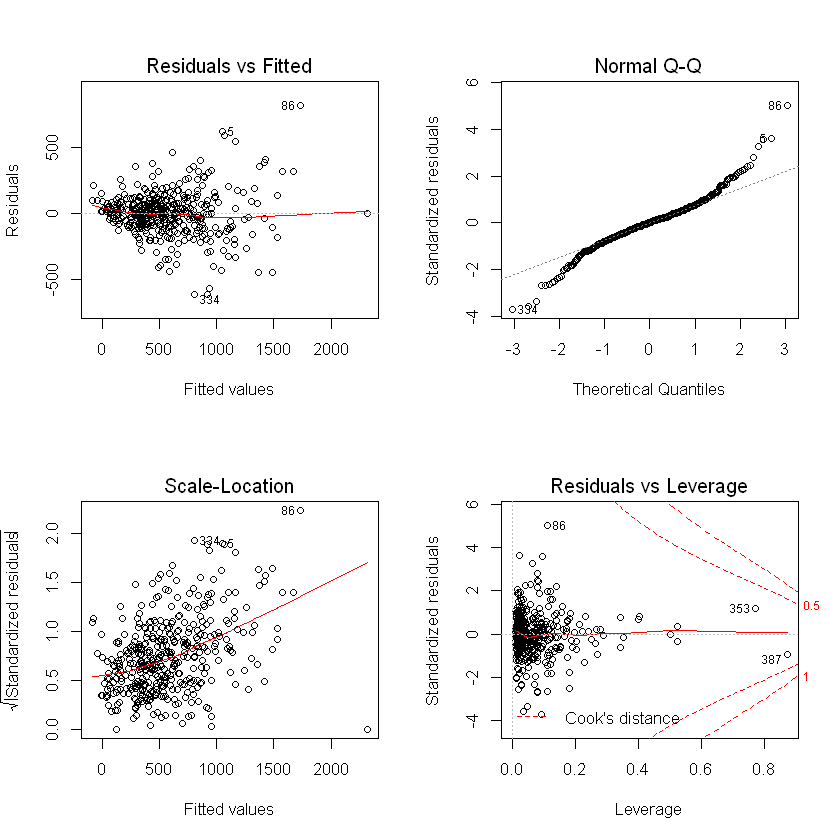

In [298]:
par(mfrow=c(2,2))
plot(train.lm)

In [299]:
train1<-train[-c(353,387),]

In [300]:
train1.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train1)

Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 330, 359"Warning message:
"not plotting observations with leverage one:
  14, 81, 140, 275, 330, 359"

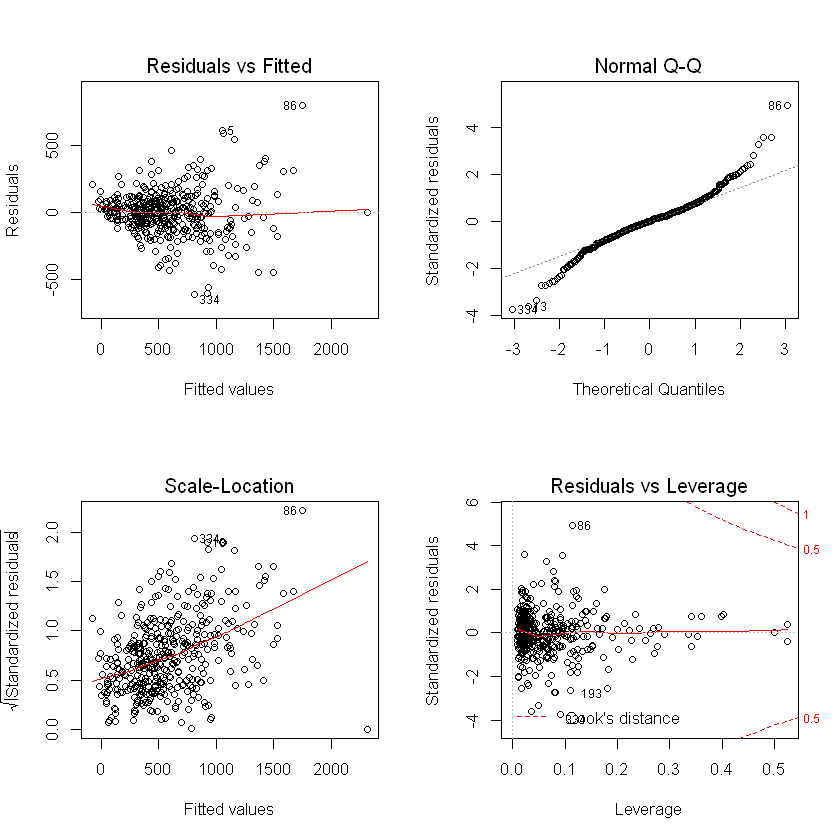

In [302]:
par(mfrow=c(2,2))
plot(train1.lm)

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"

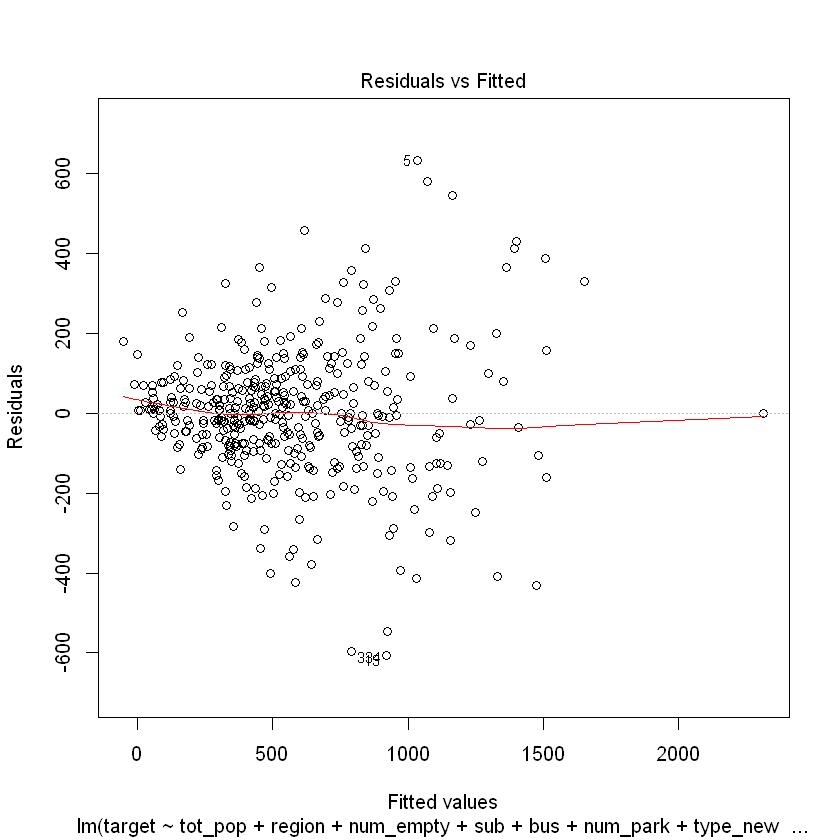

Warning message:
"not plotting observations with leverage one:
  14, 81, 139, 274, 329, 358"

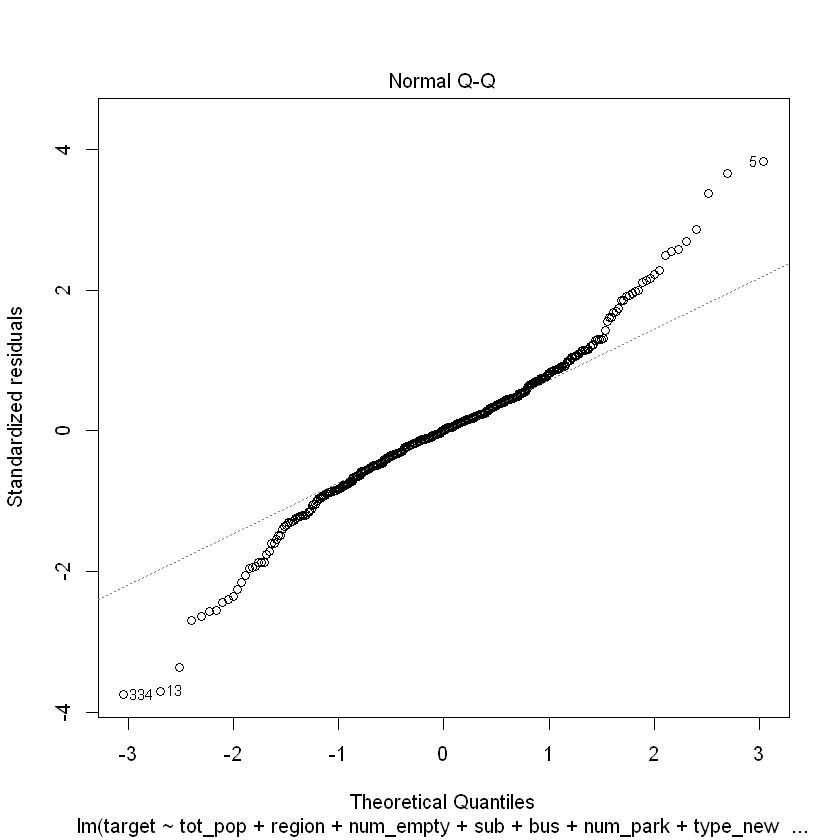

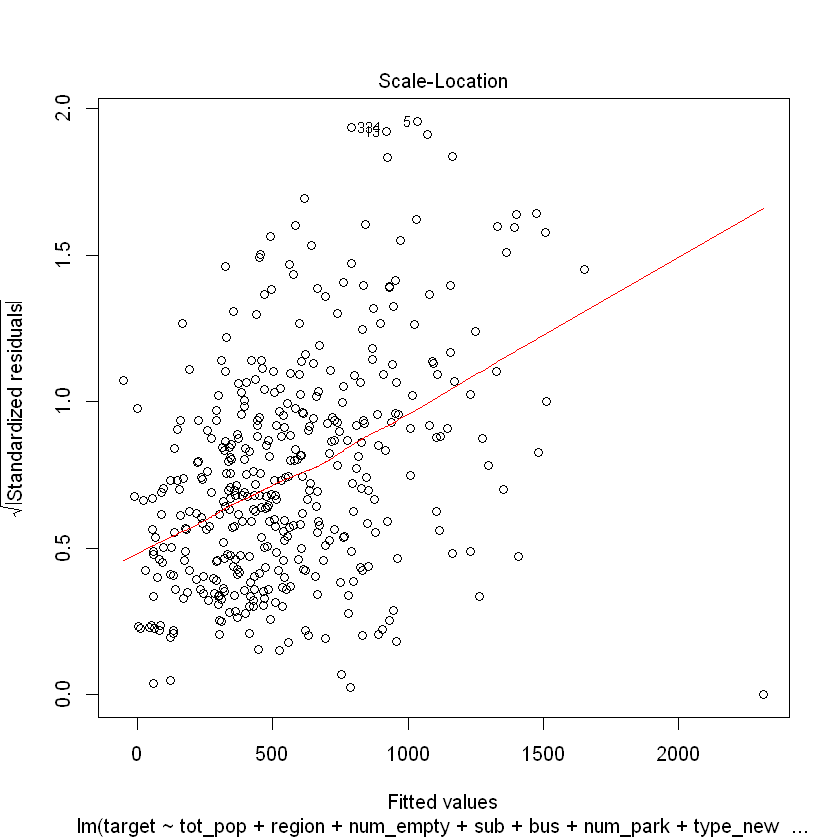

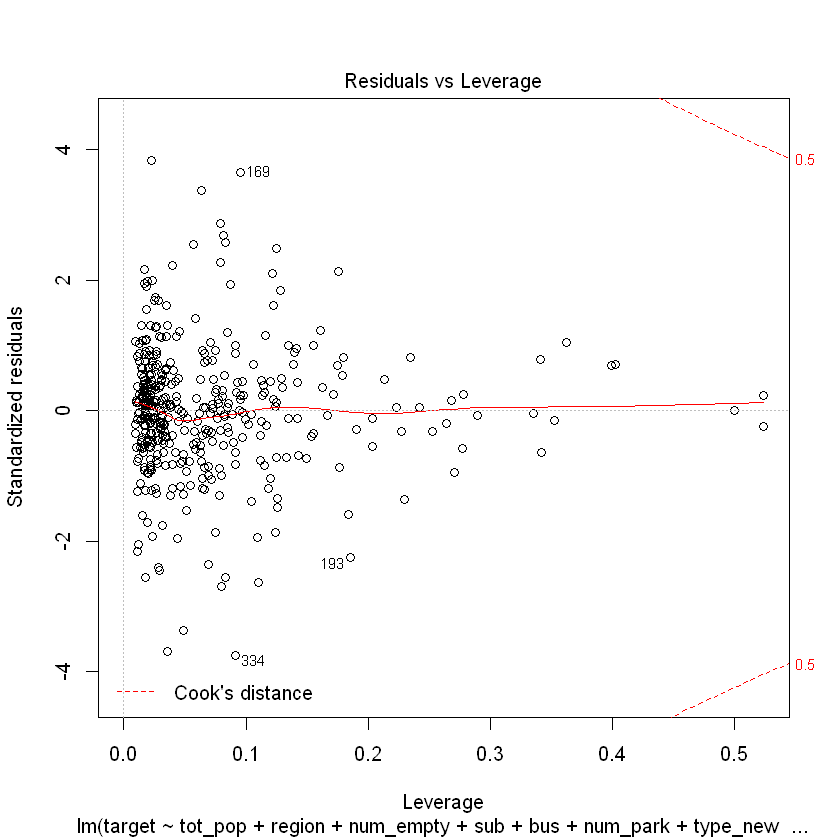

In [305]:
train2<-train[-c(353,387,86),]
train2.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train2)

plot(train2.lm)



Warning message:
"not plotting observations with leverage one:
  13, 80, 138, 273, 328, 356"

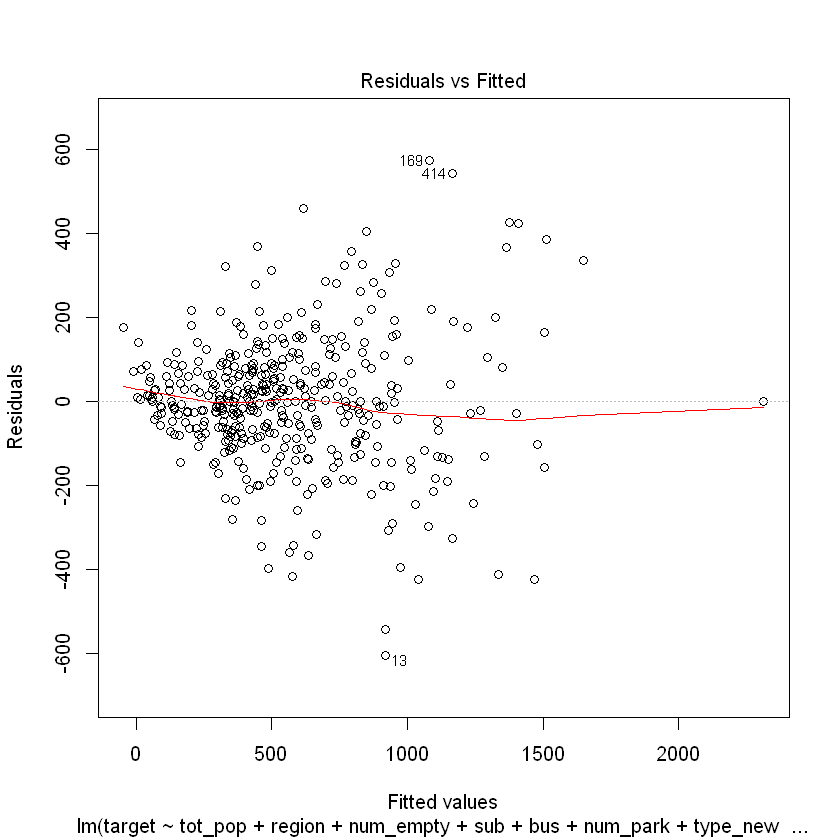

Warning message:
"not plotting observations with leverage one:
  13, 80, 138, 273, 328, 356"

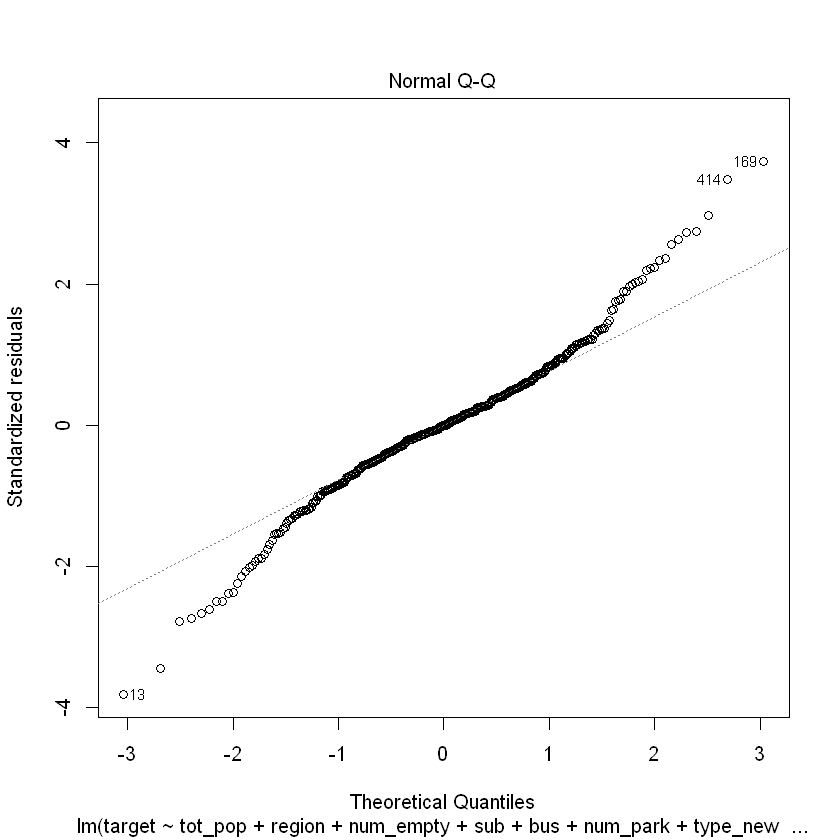

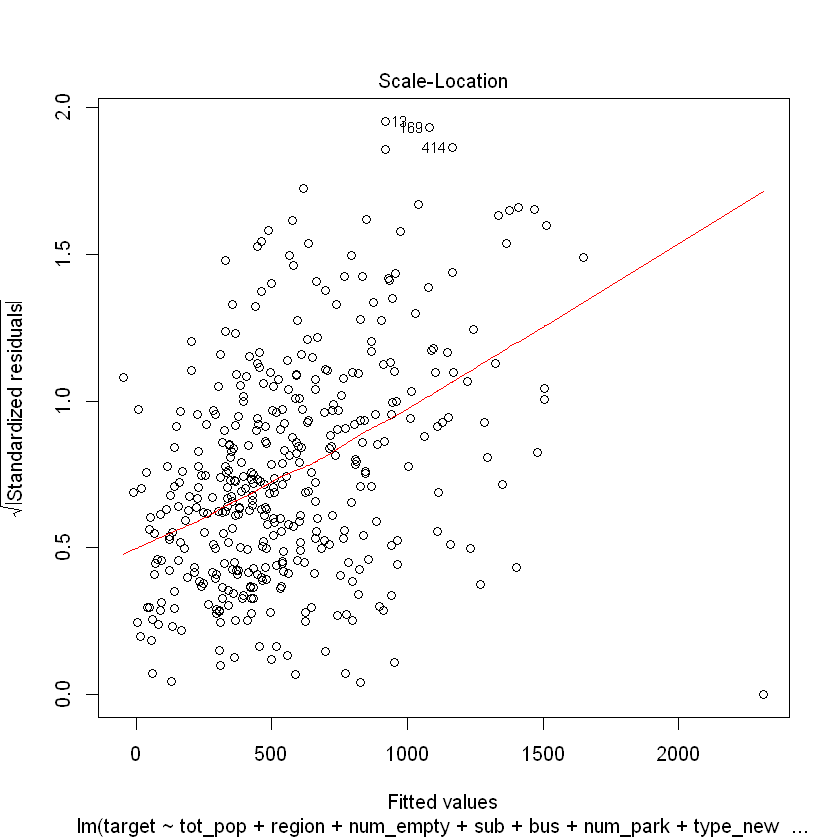

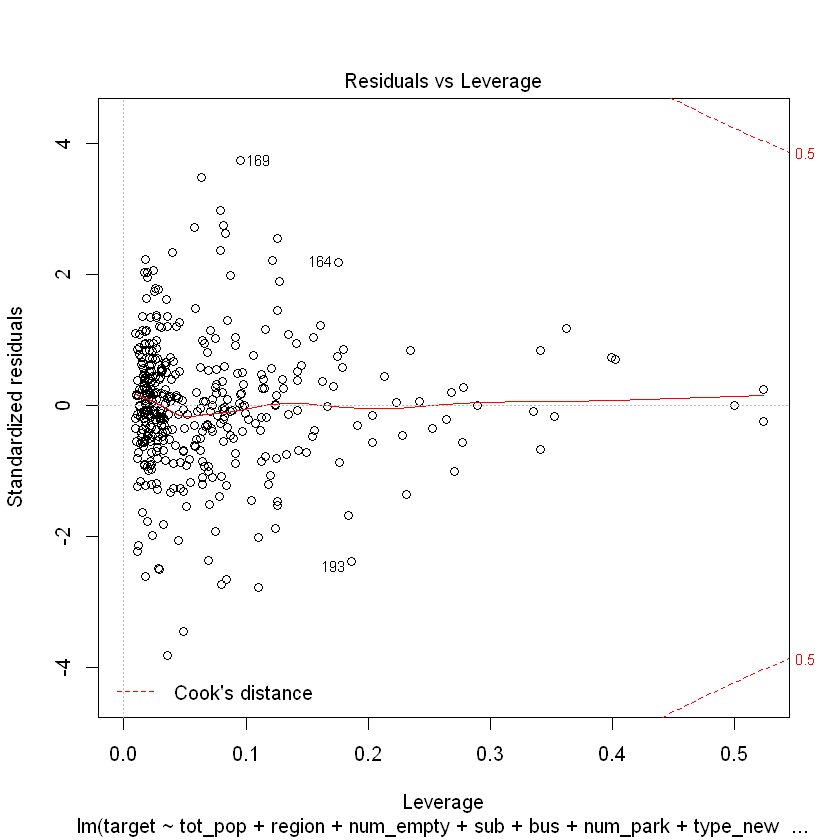

In [326]:
train3<-train[-c(353,387,86,5,334),]
train3.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train3)

plot(train3.lm)


Warning message:
"not plotting observations with leverage one:
  12, 79, 137, 271, 326, 354"Warning message:
"not plotting observations with leverage one:
  12, 79, 137, 271, 326, 354"

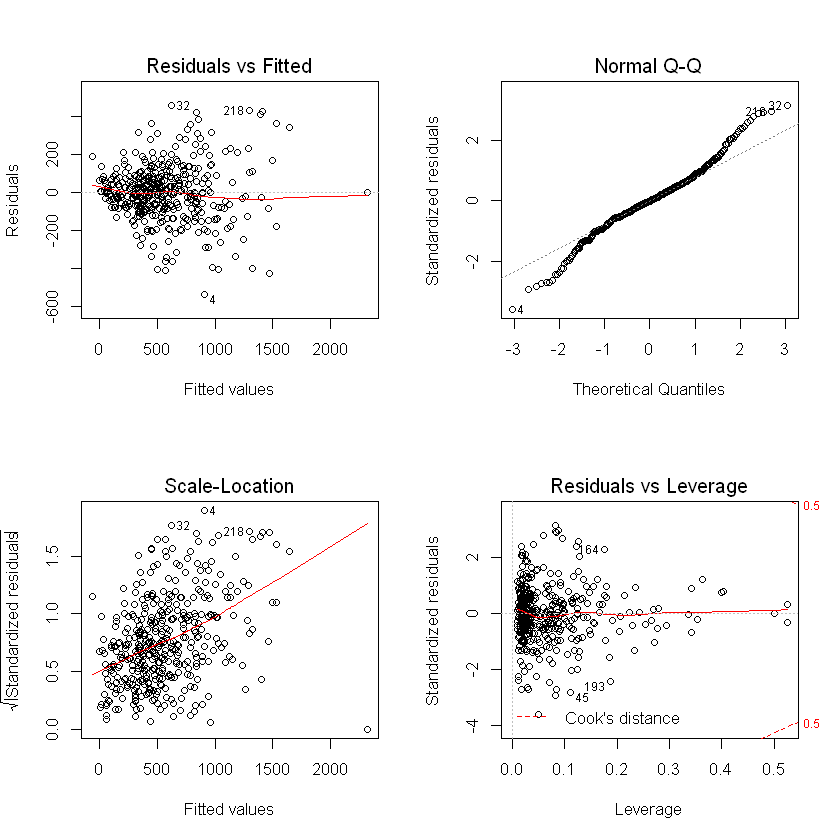

In [309]:
train4<-train[-c(353,387,86,5,334,13,169,414),]
train4.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train4)
par(mfrow=c(2,2))
plot(train4.lm)

Warning message:
"not plotting observations with leverage one:
  11, 77, 135, 268, 323, 351"Warning message:
"not plotting observations with leverage one:
  11, 77, 135, 268, 323, 351"

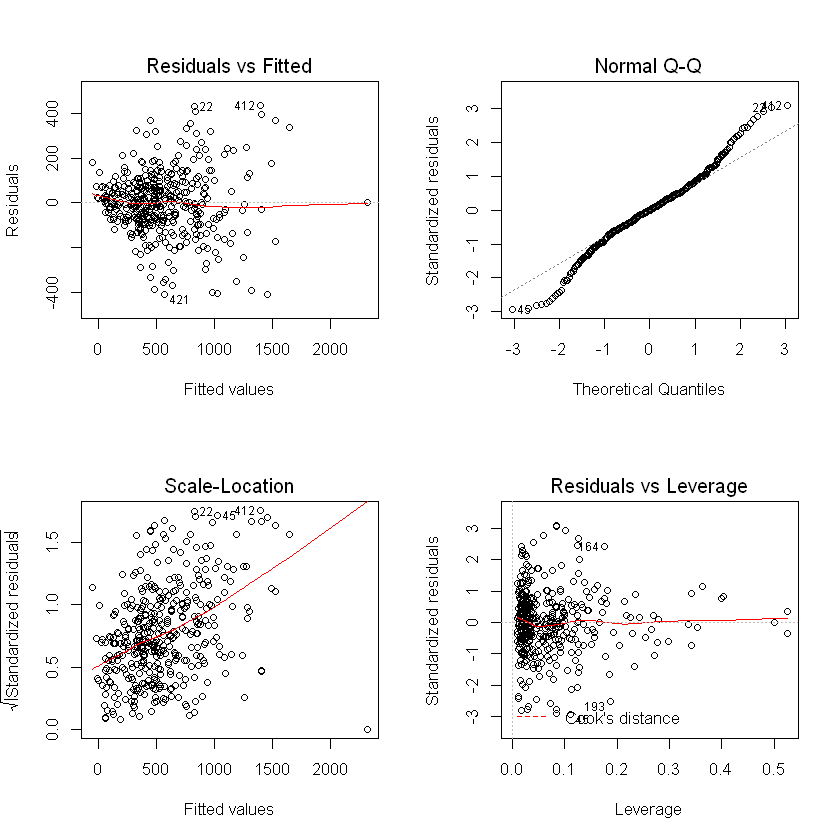

In [310]:
train5<-train[-c(353,387,86,5,334,13,169,414,4,32,218),]
train5.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train5)
par(mfrow=c(2,2))
plot(train5.lm)

Warning message:
"not plotting observations with leverage one:
  11, 73, 131, 264, 319, 346"Warning message:
"not plotting observations with leverage one:
  11, 73, 131, 264, 319, 346"

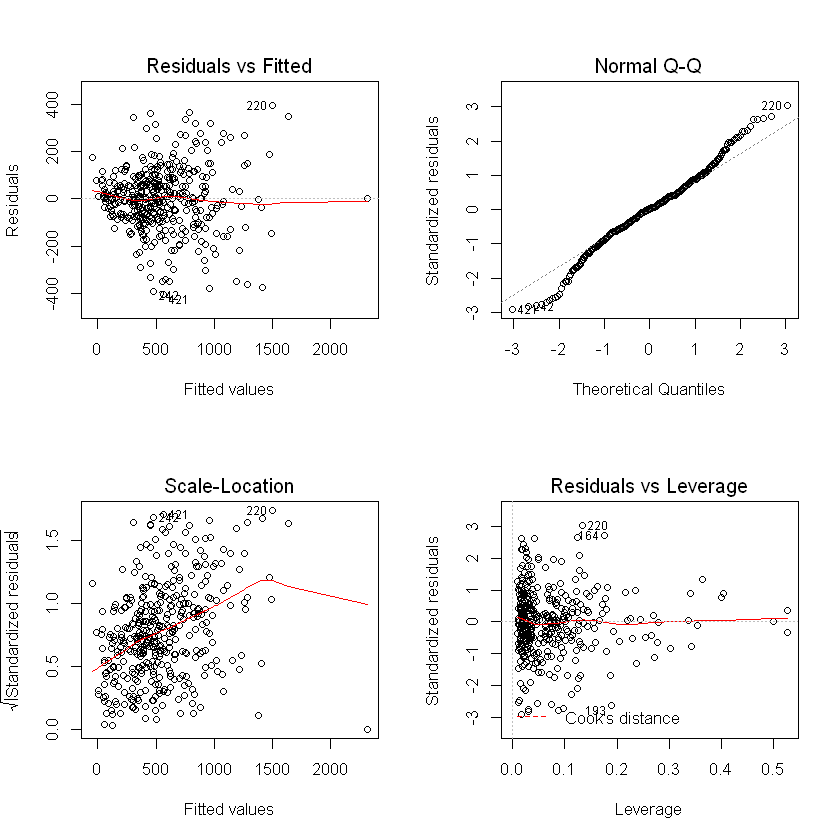

In [324]:
train6<-train[-c(353,387,86,5,334,13,169,414,4,32,218,22,45,412,347,58,20),]
train6.lm<-lm(target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
, train6)
par(mfrow=c(2,2))
plot(train6.lm)

In [327]:
step.backward = step(train6.lm, direction='backward')   # AIC=4096.83

Start:  AIC=4113.28
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im2 + prop_type_im3 + prop_type_im4 + 
    prop_type_im5 + prop_type_im6 + prop_type_im7 + prop_type_im8 + 
    prop_type_im9 + prop_type_im10 + prop_type_qual1 + prop_type_qual2 + 
    prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + prop_type_qual7 + 
    prop_type_qual8 + prop_type_qual9 + prop_type_qual10 + prop_type_qual11 + 
    prop_type_qual12 + prop_type_qual13 + prop_type_qual14 + 
    prop_areaL21 + prop_areaL29 + prop_areaL36 + prop_areaL39 + 
    prop_areaL46 + prop_areaL59 + prop_areaU59 + M_fee_deposit + 
    M_fee_rent


Step:  AIC=4113.28
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im2 + prop_type_im3 + prop_type_im4 + 
    prop_type_im5 + prop_type_im6 + prop_type_im7 + prop_type_im8 + 
    prop_type_im9 + prop_type_im10 + prop_type_qual1 + prop_type_qual2 + 
    prop_type_qual3 + prop_type_qual4 + prop_type_qua

In [329]:
step.stepwise = step(train6.lm, direction='both') # AIC=4096.83

Start:  AIC=4113.28
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im2 + prop_type_im3 + prop_type_im4 + 
    prop_type_im5 + prop_type_im6 + prop_type_im7 + prop_type_im8 + 
    prop_type_im9 + prop_type_im10 + prop_type_qual1 + prop_type_qual2 + 
    prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + prop_type_qual7 + 
    prop_type_qual8 + prop_type_qual9 + prop_type_qual10 + prop_type_qual11 + 
    prop_type_qual12 + prop_type_qual13 + prop_type_qual14 + 
    prop_areaL21 + prop_areaL29 + prop_areaL36 + prop_areaL39 + 
    prop_areaL46 + prop_areaL59 + prop_areaU59 + M_fee_deposit + 
    M_fee_rent


Step:  AIC=4113.28
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im2 + prop_type_im3 + prop_type_im4 + 
    prop_type_im5 + prop_type_im6 + prop_type_im7 + prop_type_im8 + 
    prop_type_im9 + prop_type_im10 + prop_type_qual1 + prop_type_qual2 + 
    prop_type_qual3 + prop_type_qual4 + prop_type_qua

In [330]:
step.stepwise = step(train6.lm, direction='forward')   #AIC=4113.28

Start:  AIC=4113.28
target ~ tot_pop + region + num_empty + sub + bus + num_park + 
    type_new + prop_type_im2 + prop_type_im3 + prop_type_im4 + 
    prop_type_im5 + prop_type_im6 + prop_type_im7 + prop_type_im8 + 
    prop_type_im9 + prop_type_im10 + prop_type_qual1 + prop_type_qual2 + 
    prop_type_qual3 + prop_type_qual4 + prop_type_qual5 + prop_type_qual7 + 
    prop_type_qual8 + prop_type_qual9 + prop_type_qual10 + prop_type_qual11 + 
    prop_type_qual12 + prop_type_qual13 + prop_type_qual14 + 
    prop_areaL21 + prop_areaL29 + prop_areaL36 + prop_areaL39 + 
    prop_areaL46 + prop_areaL59 + prop_areaU59 + M_fee_deposit + 
    M_fee_rent



In [331]:
nrow(train6)

[1] 413

In [334]:
train.step.forward.BIC = step(lm(target ~ 1, train6),
list(upper = ~ target~tot_pop+region+num_empty+sub+bus+num_park+type_new+prop_type_im2+prop_type_im3+prop_type_im4+prop_type_im5+prop_type_im6+prop_type_im7+prop_type_im8+prop_type_im9+prop_type_im10+prop_type_qual1+prop_type_qual2+prop_type_qual3+prop_type_qual4+prop_type_qual5+prop_type_qual7+prop_type_qual8+prop_type_qual9+prop_type_qual10+prop_type_qual11+prop_type_qual12+prop_type_qual13+prop_type_qual14+prop_areaL21+prop_areaL29+prop_areaL36+prop_areaL39+prop_areaL46+prop_areaL59+prop_areaU59+M_fee_deposit+M_fee_rent
     , train6), direction='both', k=log(413))   #BIC=4120.53

Start:  AIC=4859.63
target ~ 1

                   Df Sum of Sq      RSS    AIC
+ num_park          1  39370736 13086861 4292.2
+ tot_pop           1  16313155 36144442 4711.8
+ M_fee_rent        1   8327463 44130135 4794.3
+ type_new          1   6965926 45491671 4806.8
+ prop_type_im2     1   6912214 45545383 4807.3
+ prop_type_im8     1   6897089 45560508 4807.4
+ M_fee_deposit     1   5702502 46755095 4818.1
+ prop_type_qual4   1   4935457 47522141 4824.8
+ prop_type_qual3   1   3977071 48480526 4833.1
+ prop_areaL36      1   3737706 48719892 4835.1
+ prop_areaL59      1   3623559 48834039 4836.1
+ prop_type_qual1   1   3230497 49227100 4839.4
+ prop_areaU59      1   3145728 49311869 4840.1
+ prop_areaL21      1   1858087 50599510 4850.8
+ num_empty         1   1712916 50744681 4851.9
+ prop_areaL29      1   1678611 50778986 4852.2
+ prop_areaL39      1   1449326 51008271 4854.1
+ prop_type_im10    1   1291508 51166089 4855.4
+ prop_type_im5     1   1169669 51287929 4856.3
+ region

In [335]:
lm.f1<-lm(target ~ tot_pop + num_empty + sub + num_park + prop_type_im2 + 
    prop_type_im3 + prop_type_im4 + prop_type_im5 + prop_type_im6 + 
    prop_type_im7 + prop_type_im8 + prop_type_im9 + prop_type_im10 + 
    prop_type_qual1 + prop_type_qual2 + prop_type_qual3 + prop_type_qual5 + 
    prop_type_qual7 + prop_type_qual8 + prop_type_qual9 + prop_areaL46 + 
    prop_areaL59 + M_fee_deposit, train6)

## 3-2. 랜덤포레스트 (Random Forest)

In [527]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine



In [530]:
train<-read.table("train0723(5).3.csv", sep=',', header=T)

In [528]:
set.seed(0049)

In [531]:
str(train)

'data.frame':	430 obs. of  42 variables:
 $ code            : Factor w/ 418 levels "C1000","C1004",..: 1 2 2 3 4 5 6 7 8 9 ...
 $ tot_pop         : int  566 521 521 1144 1308 996 961 1460 389 680 ...
 $ region          : int  16 15 15 15 5 13 8 7 2 9 ...
 $ num_empty       : int  10 3 3 16 16 5 28 27 4 2 ...
 $ sub             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus             : int  1 2 2 8 6 2 3 2 4 3 ...
 $ num_park        : int  438 153 153 950 1119 823 928 1534 352 877 ...
 $ type_new        : int  0 1 1 0 0 0 0 0 0 0 ...
 $ prop_type_im1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im2   : num  0 0 0 0 0 0 0 0 0 1 ...
 $ prop_type_im3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im4   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im5   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im6   : num  1 0 0 1 1 1 1 1 1 0 ...
 $ prop_type_im7   : num  0 0.105 0.105 0 0 ...
 $ prop_type_im8   : num  0 0.895 0.895 0 0 ...
 $ prop_type_im9   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im10  : n

In [534]:
train1<-train[,-1]

In [535]:
rf<-randomForest(target~., train1)

In [542]:
test<-read.table("test0723.fi.csv", sep=',', header=T)

In [544]:
predict<-predict(rf, newdata=test)

In [545]:
write.csv(predict, "SUB_RF_0724.csv", row.names=F )

## 3.3 서포트 벡터 머신(Suport Vector Machine)

In [548]:
install.packages("kernlab")

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\RtmpyG0cYK\downloaded_packages


In [549]:
library(kernlab)

In [550]:
svm<-ksvm(target~., train1, kernel="rbfdot", C=1)

In [552]:
predict.svm<-predict(svm, test)

In [556]:
head(predict.svm)

726.2772
1281.4551
569.6767
482.1873
1040.8053
1490.8814


In [557]:
write.csv(predict.svm,"predict.svm(1).csv", row.names=F)

In [560]:
svm2<-ksvm(target~., train1, kernel="vanilladot", C=1)

 Setting default kernel parameters  


In [561]:
predict.svm<-predict(svm2, test)

In [562]:
write.csv(predict.svm,"predict.svm(2).csv", row.names=F)

In [567]:
svm.tan<-ksvm(target~., train1, kernel="tanhdot")

 Setting default kernel parameters  


In [568]:
predict.svm.tan<-predict(svm.tan, test)

In [569]:
write.csv(predict.svm.tan,"predict.svm.tan1.csv", row.names=F)

## 3-4. 배깅(Bagging)

In [570]:
install.packages("adabag")

also installing the dependency 'doParallel'



package 'doParallel' successfully unpacked and MD5 sums checked
package 'adabag' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\RtmpyG0cYK\downloaded_packages


In [571]:
library(adabag)

Warning message:
"package 'adabag' was built under R version 3.6.3"Loading required package: rpart
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:kernlab':

    alpha

The following object is masked from 'package:randomForest':

    margin

Loading required package: foreach
Loading required package: doParallel
Warning message:
"package 'doParallel' was built under R version 3.6.3"Loading required package: iterators
Loading required package: parallel


In [572]:
set.seed(0049)

In [579]:
install.packages("ipred")

package 'ipred' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ipred'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\alsdu\anaconda3\Lib\R\library\00LOCK\ipred\libs\x64\ipred.dll를 C:\Users\alsdu\anaconda3\Lib\R\library\ipred\libs\x64\ipred.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'ipred'"


The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\RtmpyG0cYK\downloaded_packages


In [580]:
library(ipred)


Attaching package: 'ipred'

The following object is masked from 'package:adabag':

    bagging



In [584]:
m.bag<-bagging(target~., train1, nbagg=50)

In [585]:
p.bag<-predict(m.bag, test)

In [586]:
write.csv(p.bag,"predict.bag1.csv", row.names=F)

# 성능개선

## 4-1. 성별과 나이 데이터셋 머징후 성능 확인

In [604]:
age<-read.table("age_gender_info.csv", sep=',', header=T)

In [605]:
age$region<-ifelse(age$region=="강원도",1,(
		ifelse(age$region=="경기도",2, (
		ifelse(age$region=="경상남도",3, (
		ifelse(age$region=="경상북도",4, (
		ifelse(age$region=="광주광역시",5, (
ifelse(age$region=="대구광역시",6,(
ifelse(age$region=="대전광역시",7, (
ifelse(age$region=="부산광역시",8, (
ifelse(age$region=="서울특별시",9, 
(ifelse(age$region=="세종특별자치시",10, (
ifelse(age$region=="울산광역시",11,
ifelse(age$region=="전라남도",12,(
ifelse(age$region=="전라북도",13,
ifelse(age$region=="제주특별자치도",14,
ifelse(age$region=="충청남도",15, 
16   )  )    )))) )  )))))) )
 )))))
 )))
 )))
 )

In [606]:
table(age$region)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 

In [607]:
train.join<-left_join(train,age,by='region')
write.csv(train.join, "train0725(1).csv", row.names=F)
test.join<-left_join(test,age,by='region')
write.csv(test.join, "test0725(1).csv", row.names=F)

In [611]:
train<-read.table("train0725(1).csv", sep=',', header=T)

In [616]:
train0<-train[,c(42:64)]

In [615]:
colnames( train[,c(42:64)] )

[1] "L10F"   "L10M"   "F10"    "M10"    "F20"    "M20"    "F30"    "M30"   
 [9] "F40"    "M40"    "F50"    "M50"    "F60"    "M60"    "F70"    "M70"   
[17] "F80"    "M80"    "F90"    "M90"    "F100"   "M100"   "target"

In [594]:
library(corrplot)

In [617]:
age.cor<-cor(train0)

In [618]:
age.cor

,L10F,L10M,F10,M10,F20,M20,F30,M30,F40,M40,...,M60,F70,M70,F80,M80,F90,M90,F100,M100,target
L10F,1.00000000,0.98397646,0.60209981,0.55455510,0.07452282,-0.2155626,0.68207333,0.45322326,0.85305884,0.8596571,...,-0.87963348,-0.787459026,-0.67710510,-0.7456954,-0.55556850,-0.487225602,-0.238582301,0.15914679,0.172243631,0.153577549
L10M,0.98397646,1.00000000,0.58061348,0.54324918,0.04439465,-0.2240400,0.64330629,0.40119533,0.85043430,0.8818712,...,-0.87443712,-0.760421755,-0.66216787,-0.7016946,-0.55254762,-0.427948589,-0.223790588,0.18639552,0.216724846,0.156837216
F10,0.60209981,0.58061348,1.00000000,0.98826583,0.54806160,0.4914377,0.09024511,-0.13579367,0.79813683,0.4438749,...,-0.71369286,-0.774936376,-0.80747628,-0.6910294,-0.77230154,-0.468131709,-0.469461493,-0.36486321,0.231741820,-0.113795659
M10,0.55455510,0.54324918,0.98826583,1.00000000,0.53764299,0.5406462,0.01743132,-0.18708811,0.77991182,0.4093368,...,-0.67918005,-0.748707314,-0.79718677,-0.6745449,-0.77017723,-0.483094024,-0.472804360,-0.42203172,0.281007658,-0.138602007
F20,0.07452282,0.04439465,0.54806160,0.53764299,1.00000000,0.8327580,0.08841007,0.10883914,0.26928243,0.0861672,...,-0.42087167,-0.498970933,-0.55170350,-0.5271284,-0.72149997,-0.397577645,-0.678789582,-0.38854276,0.196386402,-0.058265431
M20,-0.21556265,-0.22403998,0.49143773,0.54064624,0.83275798,1.0000000,-0.29368110,-0.21411286,0.18105294,-0.1584904,...,-0.15432640,-0.306437498,-0.43766968,-0.3498817,-0.61383909,-0.384874390,-0.632270790,-0.63915316,0.151315977,-0.186807597
F30,0.68207333,0.64330629,0.09024511,0.01743132,0.08841007,-0.2936811,1.00000000,0.92471054,0.46868737,0.6657601,...,-0.62181861,-0.609598823,-0.45175847,-0.6293603,-0.38554548,-0.455744123,-0.136153152,0.26056069,0.047363240,0.297529199
M30,0.45322326,0.40119533,-0.13579367,-0.18708811,0.10883914,-0.2141129,0.92471054,1.00000000,0.24251041,0.5096578,...,-0.45107020,-0.425642698,-0.29209222,-0.5395618,-0.27299312,-0.487157007,-0.157564953,0.20414468,-0.023298133,0.295506001
F40,0.85305884,0.85043430,0.79813683,0.77991182,0.26928243,0.1810529,0.46868737,0.24251041,1.00000000,0.7277704,...,-0.85937330,-0.894486931,-0.86975861,-0.8421972,-0.78638171,-0.649627910,-0.496117572,-0.12049402,0.043792722,0.062619635
M40,0.85965710,0.88187118,0.44387486,0.40933682,0.08616720,-0.1584904,0.66576008,0.50965780,0.72777038,1.0000000,...,-0.87958969,-0.638069869,-0.59198525,-0.6835634,-0.53875035,-0.377639097,-0.217300999,0.28244587,0.314201441,0.194484926


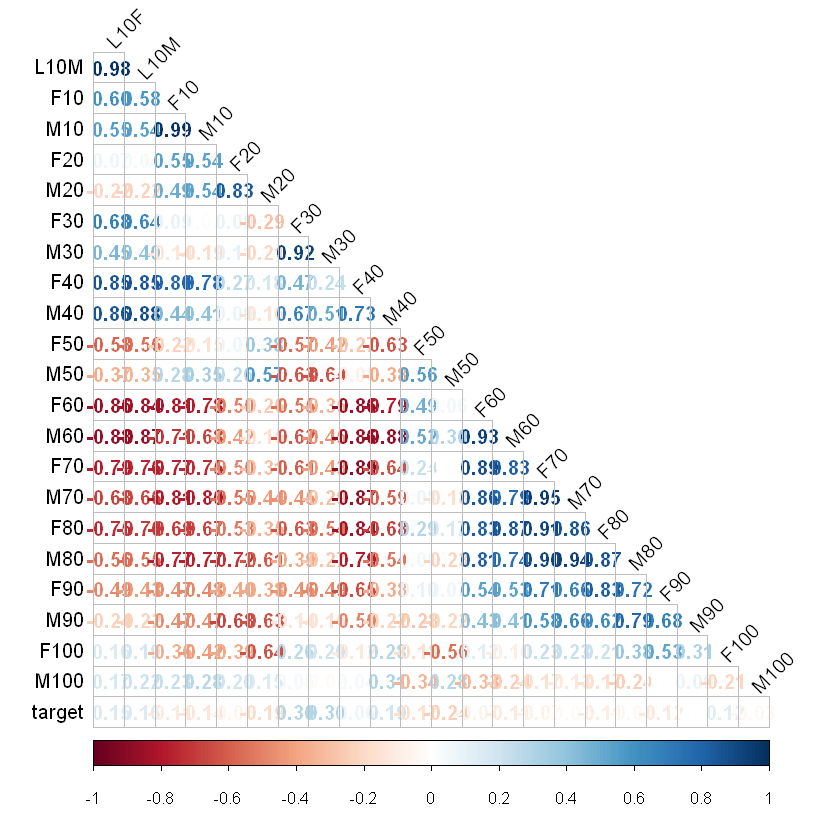

In [619]:
corrplot(age.cor, method="number",  type = "lower" ,addCoef.col = "black" ,  tl.col = "black", tl.srt = 45, diag = F) 

In [620]:
#train set 
attach(train)
train$L1040<-L10M+L10F+F40+M40
train$X10<-M10+F10
train$X20<-M20+F20
train$X30<-M30+F30
train$F50<-F50
train$M50<-M50
train$X6080<-M60+F60+M70+F70+M80+F80
train$X90<-M90+F90
train$F100<-F100
train$M100<-M100
write.csv(train, "train0725(2).csv", row.names=F)


In [622]:
detach(train)

In [631]:
detach(test1)

In [634]:
detach(test)

In [635]:
detach(test1)

In [636]:
test2<-read.table("test0725(1).csv" , sep=',', header=T) 

In [637]:
attach(test2)

In [638]:
test2$L1040<-L10M+L10F+F40+M40
test2$X10<-M10+F10
test2$X20<-M20+F20
test2$X30<-M30+F30
test2$F50<-F50
test2$M50<-M50
test2$X6080<-M60+F60+M70+F70+M80+F80
test2$X90<-M90+F90
test2$F100<-F100
test2$M100<-M100

In [639]:
write.csv(test2, "test0725(2).csv", row.names=F)

## 4-2. 정규화 후 성능 확인

In [1]:
train <-read.table("train0726.csv", sep=',', header=T )
test <-read.table("test0723.fi (1).csv", sep=',', header=T)

In [2]:
str(train)  

'data.frame':	423 obs. of  42 variables:
 $ code            : Factor w/ 411 levels "C1000","C1004",..: 1 2 2 3 4 5 6 7 8 9 ...
 $ tot_pop         : int  566 521 521 1144 1308 996 961 1460 389 680 ...
 $ region          : int  16 15 15 15 5 13 8 7 2 9 ...
 $ num_empty       : int  10 3 3 16 16 5 28 27 4 2 ...
 $ sub             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus             : int  1 2 2 8 6 2 3 2 4 3 ...
 $ num_park        : int  438 153 153 950 1119 823 928 1534 352 877 ...
 $ type_new        : int  0 1 1 0 0 0 0 0 0 0 ...
 $ prop_type_im1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im2   : num  0 0 0 0 0 0 0 0 0 1 ...
 $ prop_type_im3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im4   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im5   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im6   : num  1 0 0 1 1 1 1 1 1 0 ...
 $ prop_type_im7   : num  0 0.105 0.105 0 0 ...
 $ prop_type_im8   : num  0 0.895 0.895 0 0 ...
 $ prop_type_im9   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im10  : n

In [ ]:
#  $ tot_pop    $ region     $ sub   $ bus   $ num_park  $ M_fee_deposit   $ M_fee_rent  $ target 

In [3]:
normalize <- function(x) {
  return((x-min(x))/(max(x)-min(x)))
}

In [4]:
train$ tot_pop<-normalize(train$ tot_pop)
train$ region<-normalize(train$ region)
train$ sub<-normalize(train$ sub)
train$ bus<- normalize(train$ bus)
train$ num_park<- normalize(train$ num_park)
train$ M_fee_deposit<- normalize(train$ M_fee_deposit)
train$ M_fee_rent<- normalize(train$ M_fee_rent)

In [12]:
write.csv(train, "train.norm(1).csv", row.names=F)

In [6]:
str(test)

'data.frame':	150 obs. of  41 variables:
 $ code            : Factor w/ 150 levels "C1003","C1006",..: 11 14 45 84 39 54 78 67 41 96 ...
 $ tot_pop         : int  754 1354 619 593 1297 1974 1349 533 470 353 ...
 $ region          : int  2 2 8 13 2 2 13 13 3 3 ...
 $ num_empty       : int  14 9 18 7 11 15 25 17 18 6 ...
 $ sub             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ bus             : int  2 3 16 3 2 6 2 1 4 1 ...
 $ num_park        : int  683 1216 547 543 1112 1696 1098 470 384 280 ...
 $ type_new        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im3   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im5   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im6   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ prop_type_im7   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im8   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_type_im10  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_areaL21    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prop_areaL29    : num  0 0 0 0 0 ...
 $ prop_areaL3

In [7]:
test$ tot_pop<-normalize(test$ tot_pop)
test$ region<-normalize(test$ region)
test$ sub<-normalize(test$ sub)
test$ bus<- normalize(test$ bus)

test$num_park<- normalize(test$ num_park)
test$ M_fee_deposit<- normalize(test$ M_fee_deposit)
test$ M_fee_rent<- normalize(test$ M_fee_rent)

In [13]:
write.csv(test, "test.norm(1).csv", row.names=F)

In [658]:
sub<-read.table("cat0726.normB.csv", sep=',', header=T)

In [653]:
str(sub)

'data.frame':	150 obs. of  2 variables:
 $ code: Factor w/ 150 levels "C1003","C1006",..: 11 14 45 84 39 54 78 67 41 96 ...
 $ num : num  0.28 0.475 0.193 0.224 0.461 ...


In [659]:
denormalize <- function(x) {
  return(    x*(max(train$target)-min(train$target)) + min(train$target)        )
}

In [660]:
denormalize(sub$num)

[1] 0.27964627 0.47452501 0.19327968 0.22404134 0.46087952 0.62466944
  [7] 0.37686863 0.17139306 0.12439111 0.09459328 0.18820978 0.15191866
 [13] 0.15465327 0.10890953 0.14145065 0.11117072 0.19001695 0.12396379
 [19] 0.08169748 0.26491699 0.11154043 0.18871837 0.20013658 0.19825517
 [25] 0.13894750 0.09036434 0.10954002 0.25756184 0.20555854 0.20256792
 [31] 0.37485319 0.08148443 0.20169774 0.07456855 0.06835696 0.11424500
 [37] 0.15304106 0.21973092 0.31118245 0.14235390 0.18377904 0.20007353
 [43] 0.17337401 0.24350795 0.31227052 0.47557851 0.17454133 0.25841245
 [49] 0.15413381 0.14196626 0.29927239 0.10342315 0.41598440 0.26621558
 [55] 0.24739825 0.09321824 0.24491654 0.11460179 0.19178683 0.09257189
 [61] 0.14067200 0.23216461 0.38802363 0.19682144 0.09180239 0.11115608
 [67] 0.22670534 0.38719062 0.23693887 0.18833210 0.24849801 0.11620938
 [73] 0.25863077 0.34076308 0.37771832 0.19130840 0.27214633 0.33865423
 [79] 0.27715796 0.33749325 0.31886925 0.48577853 0.12766264 0.10298691
 [85] 0.11287442 0.10865910 0.08589848 0.14854549 0.12930903 0.36925652
 [91] 0.37518831 0.28764442 0.10757612 0.24303823 0.45140930 0.38978746
 [97] 0.25268681 0.44210148 0.30435111 0.34360604 0.32873680 0.15566011
[103] 0.32089765 0.28267272 0.42031805 0.24298486 0.44604409 0.21601035
[109] 0.39481632 0.10418570 0.21507144 0.43960191 0.32185454 0.39188271
[115] 0.28662038 0.06923920 0.07944355 0.23615237 0.35974857 0.56055757
[121] 0.21308002 0.28209923 0.27379480 0.14689345 0.28895713 0.09690722
[127] 0.16559978 0.22269443 0.04645917 0.04934741 0.06644148 0.20740872
[133] 0.21782603 0.10481223 0.08617057 0.09551975 0.20243053 0.20414329
[139] 0.19606072 0.07908003 0.16198255 0.05577211 0.05125287 0.06044592
[145] 0.12026784 0.10165372 0.17718622 0.05180856 0.13900411 0.09048218